## Tracking Healthcare Prices Against Inflation: A Time Series Analysis of U.S. Prescription Drugs, Hospital Services, and Physician Services

> Taylor Gorak <br>
> PUBH 6899: Final Project


## Introduction

Healthcare spending in the United States has steadily increased, placing pressure on both household budgets and the national economy. Prices for prescription drugs, hospital services, and physician care have been a key driver of this trend, often rising faster than many other goods and services. Understanding how these costs change over time — and how they compare to overall inflation — is critical for evaluating the affordability of care, the sustainability of the healthcare system, and the financial challenges faced by families.

This project represents an exploratory analysis using time series methods to track price trends in prescription drugs, hospital fees, and physician charges, comparing each to the general inflation rate in the U.S. economy. The goal is to explore patterns in the data and practice modeling techniques to illustrate how healthcare costs evolve relative to general inflation, rather than to produce definitive causal conclusions. By examining these trends, the study aims to provide insights that contribute to broader discussions on cost containment and healthcare spending dynamics.

## Literature Review

Recent scholarship has investigated the relationship between healthcare price trends and general inflation in the United States, with particular attention to prescription drugs, hospital services, and physician service costs. Academic research consistently finds that prescription drug prices have outpaced overall inflation, especially for high-cost specialty medications. For instance, work by Rajkumar (2020) demonstrates that annual growth rates for U.S. prescription drug spending range from 3–6%, with cancer drug prices rising by over 10% per year—often exceeding inflation due to repeated price increases on established drugs such as insulin. Barriers to value-based pricing and Medicare negotiation have been identified as central factors driving these trends.

In examining targeted oral anticancer drugs, Shih et al. (2017) report that while the general prescription drug consumer price index grew at 3% annually between 2007 and 2012, the mean prices for these specialized drugs rose nearly 12% each year, creating substantial financial strain for affected patients. Although some policy interventions have helped reduce out-of-pocket costs for certain populations, rapid price escalation remains a crucial concern.

Methodological approaches to measuring healthcare price inflation have also been subject to rigorous analysis. Dunn et al. (2018) recommend selecting price indices carefully to account for medical expenditures, advocating use of the Personal Health Care index or PCE health-by-function index for aggregate spending, while CPI medical care is appropriate for out-of-pocket estimates. No single index fully captures the complexity of healthcare inflation, and methodological variation can create significant disparities in reported findings. Building on this, Mattingly et al. (2023) highlight that traditional indices may understate the impact of high-priced drug launches, and stress the need for adjustments based on prescription duration and rebates, arguing that new index methodologies are necessary to inform policy solutions like the Inflation Reduction Act.

Although much of the literature centers on prescription drugs, broader analyses reveal that hospital and physician service prices have also increased, contributing to overall healthcare spending growth. Schumock et al. (2017, 2023) find that pharmaceutical expenditures in hospitals and clinics outpace general inflation, with cost increases stemming from both utilization and higher prices for existing therapies. Hospital and physician service prices have risen, albeit typically at a slower rate compared to pharmaceuticals, adding to cumulative cost pressures.

From a policy and economic standpoint, researchers such as Wagner et al. (2024) argue that inflation adjustment is vital when interpreting drug spending trends, as unadjusted figures can overstate nominal increases. Recent legislative efforts—including the Inflation Reduction Act’s introduction of inflation penalties and rebates—seek to restrain price growth, though analysts emphasize these measures may only partially address persistent cost escalation within the broader healthcare sector (Dickson, 2020; Reitsma et al., 2025).

## Data

This project is primarily an exploratory analysis aimed at examining and understanding healthcare price data through descriptive and time series methods. Rather than testing formal hypotheses or drawing definitive causal conclusions, the focus is on exploring patterns, trends, and characteristics within the data to provide initial insights and practice modeling techniques. This approach helps evaluate data quality, identify seasonal behaviors, and inform future, more detailed research.

All four time series used in this project were obtained from the Federal Reserve Economic Data (FRED) database, which compiles economic and financial indicators from numerous U.S. government sources. The series analyzed here originate from the U.S. Bureau of Labor Statistics (BLS) Consumer Price Index (CPI) and Producer Price Index (PPI) programs. Each series is measured monthly, ensuring a consistent frequency and sufficient length for time series analysis. To avoid the volatility surrounding the 2008 recession and the COVID-19 period, the analysis focuses on data from 2009 through 2019.

**Series selected for analysis:**

1. **Prescription Drugs PPI** (FRED Code: WPUSI07003)  
   Measures the average change in prices received by domestic producers for prescription drug products.

2. **Hospital Services CPI** (FRED Code: CUUR0000SEMD)  
   Measures price changes for hospital services paid by urban consumers.

3. **Physician Services CPI** (FRED Code: CUUR0000SEMC)  
   Measures price changes for physician services in urban areas.

4. **Overall CPI (All Urban Consumers)** (FRED Code: CPIAUCSL)  
   Represents the general inflation rate for all urban consumers and serves as a benchmark for comparison with healthcare sector prices.

**Rationale for data selection:**  
All series are monthly and span multiple decades, providing more than 100 observations each. Because they are CPI or PPI measures, they share a comparable structure and scale, reflecting relative price changes rather than nominal price levels. These shared features make the series suitable for cross-sector comparisons and assessing how healthcare-specific prices have evolved relative to the overall inflation rate.

**Data collection and construction:**  
The BLS collects CPI data through surveys of retail establishments and service providers across the United States, using in-person, telephone, and online methods to capture prices actually paid by consumers. The PPI series, by contrast, reflects prices received by producers and is based on surveys of businesses. Both indices are designed to track average price movements over time for a fixed basket of goods and services.

**Data limitations:**  
Although the CPI and PPI are widely used and standardized, there are several limitations. Some monthly values are imputed when prices are unavailable, and both indices are subject to sampling error and potential measurement bias. The BLS periodically updates spending weights and sampling frames to reflect changing consumption patterns, which can introduce subtle breaks in long-run comparability. Additionally, neither index perfectly captures price variation experienced by specific populations or regions.

**Adjustments and transformations:**  
This project uses non-seasonally adjusted monthly index values to allow consistent handling of trends and patterns. Seasonal adjustments, if necessary, will be performed during analysis to maintain transparency in data processing. Index values are expressed relative to a standardized base period (1982–1984 = 100), ensuring comparability across all four series. Maintaining raw index data allows for flexibility in subsequent transformations, such as computing year-over-year percentage changes or applying log differences when modeling inflation dynamics.



## Methods

### 1. Overview

This project extends the a univariate analysis of four selected time series into a multivariate modeling framework. The objective is to examine the dynamic relationships among these series and generate multivariate forecasts using either a Vector Autoregressive (VAR) or Vector Error Correction Model (VECM), depending on the presence of co-integration.  

Each stage of the analysis follows a systematic structure: assessing stationarity, testing for co-integration, specifying an appropriate model, conducting innovation accounting, and comparing forecasts to those from the midterm univariate models.

---

### 2. Stationarity Assessment

The first step is to assess whether each individual time series is stationary—meaning its mean, variance, and autocovariance remain constant over time. This assumption is critical, as most time series models rely on stationarity for valid inference.

#### 2.1 Definitions of Stationarity

**Weak stationarity** requires that for all time points $t$:

1. $E[y_t] = \mu$(constant mean)  
2. $Var(y_t) = \sigma^2$ (constant variance)  
3. $Cov(y_t, y_{t-l}) = \gamma(l)$ (autocovariance depends only on lag $l$)

**Strict stationarity** is a stronger form where the joint distribution is invariant to shifts in time:
$$F(y_{t_1}, \ldots, y_{t_k}) = F(y_{t_1+h}, \ldots, y_{t_k+h})$$
for any $h$ and $t_1, \ldots, t_k$.

#### 2.2 Testing Approach

Visual inspection (line plots, ACF/PACF) and formal tests (ADF and KPSS) are used to assess stationarity.  
Non-stationary series are differenced or detrended until stationarity is achieved, ensuring suitability for further modeling.

---

### 3. Data Partitioning

As in the midterm, each series is divided into **training** and **test** sets:
- Training set: observations $1$ through $T - 6$
- Test set: last six observations, $(T - 5):T$

This split is maintained to facilitate direct comparison of forecast performance between the univariate and multivariate models.

---

### 4. Co-Integration Analysis

#### 4.1 Definition and Importance

In multivariate settings, **co-integration** refers to a situation where non-stationary series share a common long-run equilibrium relationship. Even though individual series may follow random walks, certain linear combinations of them can be stationary.

Formally, consider $k$ non-stationary series, each integrated of order one, $I(1)$:
$$\mathbf{y}_t = 
\begin{bmatrix}
y_{1t} \\ y_{2t} \\ \vdots \\ y_{kt}
\end{bmatrix}$$

If there exists a non-zero vector $\boldsymbol{\beta}$ such that
$$\boldsymbol{\beta}' \mathbf{y}_t \sim I(0),$$
then the series are co-integrated with cointegrating vector $\boldsymbol{\beta}$.

**Intuitively**, this means that while each series may drift over time, they move together in a way that prevents them from diverging indefinitely, suggesting an equilibrium linkage.

#### 4.2 Testing for Co-Integration

To test for co-integration, the **Johansen test** will be applied. It assesses the rank $r$ of the matrix $\Pi$ in the VAR representation:
$$\Delta \mathbf{y}_t = \Pi \mathbf{y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} + \boldsymbol{\varepsilon}_t$$
If $\Pi$ has rank $r$, then there are $r$ co-integrating relationships among the variables.  

- $r = 0$: No co-integration → VAR model is appropriate  
- $0 < r < k$: Co-integration exists → VECM model is appropriate  

---

### 5. Model Specification

#### 5.1 VAR or VECM Construction

Depending on the results of the co-integration tests:

- **If no co-integration is found:** A **VAR(p)** model will be estimated:
  $$\mathbf{y}_t = c + \sum_{i=1}^{p} A_i \mathbf{y}_{t-i} + \boldsymbol{\varepsilon}_t$$

- **If co-integration is present:** A **VECM** will be used:
  $$\Delta \mathbf{y}_t = \alpha \boldsymbol{\beta}' \mathbf{y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} + \boldsymbol{\varepsilon}_t$$
  where:
  - $\boldsymbol{\beta}' \mathbf{y}_{t-1}$ represents the long-run equilibrium
  - $\alpha$ captures the speed of adjustment back to equilibrium

The selection of endogenous and exogenous variables will be guided by theoretical reasoning and prior literature. Lag length $p$ will be chosen based on AIC and BIC.

---

### 6. Innovation Accounting

#### 6.1 Impulse Response Functions (IRFs)

An **impulse response function** traces the effect of a one-time shock to one variable on the current and future values of all variables in the system.

Mathematically, if the system is written as:
$$\mathbf{y}_t = \sum_{i=0}^{\infty} \Phi_i \boldsymbol{\varepsilon}_{t-i},$$
then the IRF at horizon \( h \) is given by \( \Phi_h \), describing the response of each variable to an innovation at time $t$.

**Orthogonal IRFs** assume shocks are uncorrelated (achieved via Cholesky decomposition), while **non-orthogonal IRFs** do not, and hence depend on the contemporaneous relationships among variables.

#### 6.2 Forecast Error Variance Decomposition (FEVD)

FEVD quantifies how much of the forecast error variance of each variable is attributable to shocks in each of the system’s variables. Formally, for horizon $h$:
$$\text{FEVD}_{ij}(h) = \frac{\sum_{s=0}^{h-1} (e_i' \Phi_s \Sigma e_j)^2}{\sum_{s=0}^{h-1} (e_i' \Phi_s \Sigma \Phi_s' e_i)}$$
where $e_i$ and $e_j$ are selection vectors, and $\Sigma$ is the covariance matrix of residuals.

**Intuitively**, FEVD shows the relative importance of each variable’s innovations in explaining forecast uncertainty over time.

#### 6.3 Implementation

A full innovation accounting will be performed:
- Plot IRFs to visualize dynamic relationships and adjustment speeds.
- Tabulate FEVD results to identify which shocks dominate system variability.
- Interpret the economic or policy relevance of these dynamics.

---

### 7. Forecasting and Comparison

Using the estimated VAR or VECM, multi-step forecasts will be generated for the test period. Forecast accuracy will be evaluated using a consistent loss function, such as:

$$MSE = \frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2$$

These forecasts will be compared to the univariate forecasts from the midterm analysis.  
Performance differences will be discussed in terms of model structure, information content, and the presence (or absence) of co-integration relationships.

---

### 8. Summary

This methodological framework ensures a comprehensive examination of both short-run and long-run relationships among the selected time series. By combining stationarity and co-integration diagnostics with VAR/VECM modeling, innovation accounting, and forecast evaluation, the analysis provides a robust foundation for understanding system dynamics and predictive performance.


The first step in time series analysis is to assess whether each data series is stationary, which means its statistical properties do not change over time. Stationarity is important because most time series models assume it to make reliable forecasts and interpretations.

**Stationarity types:**

- **Weak stationarity** requires three conditions for every time point $t$:
  1. Constant mean: $E[y_t] = \mu$ for all $t$.
  2. Constant variance: $Var(y_t) = \sigma^2$ for all $t$.
  3. Constant autocovariance depending only on lag $l$: $Cov(y_t, y_{t-l}) = \gamma(l)$.

  Intuitively, the series "hovers" around a fixed mean, with stable variability, and the relationship between values depends only on how far apart they are, not when they occur.

- **Strict stationarity** is a stronger condition where the entire joint distribution of any collection of observations remains the same when shifted in time. Formally, for any set of time points $t_1, \dots, t_k$ and any $h$, the joint distribution satisfies
 $$F(y_{t_1}, \ldots, y_{t_k}) = F(y_{t_1+h}, \ldots, y_{t_k+h}).$$

  This means the process behaves statistically identically throughout the time period.

**Assessment approach:**

Each time series will be explored individually to determine stationarity using both visual and statistical methods:

- *Visual methods* include plotting the series to check for trends or changing variance, and analyzing autocorrelation (ACF) and partial autocorrelation (PACF) to see how correlations change over lags.
- *Statistical methods* will utilize unit root tests such as the Augmented Dickey-Fuller (ADF) test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, which have complementary hypotheses on stationarity.

Based on the stationarity results, appropriate transformations such as differencing or detrending will be applied to render the series stationary if necessary. This step is essential before selecting and fitting time series models, which will be chosen according to established criteria and patterns observed in the data.

The goal of this methods section is to perform a rigorous, stepwise exploratory analysis of each series to ensure data suitability for modeling and to inform model selection.

### Modeling and Forecasting Steps

**Model Selection and Training/Test Split**

- Select one time series for in-depth modeling.
- Split the data into a training set consisting of observations 1 through $(T-6)$, and a test set consisting of the last six observations \(((T-5):T)\).
- Use the Box-Jenkins methodology (ARIMA framework) to model the training data.

  - Define the model selection criteria to be used (e.g., AIC, BIC), explaining the strengths and weaknesses of each.
  - Evaluate the ACF and PACF plots of the stationary series to decide on an initial model configuration (specify your reasoning).
  - Estimate the initial model and refine by moving from general to more specific models using ARIMA techniques.
  - Provide a table comparing at least three candidate models, including your selected "best" model based on information criteria, and detail the decision process.

**Serial Correlation Testing**

- Define serial correlation formally, including the relevant mathematical expressions.
- Describe appropriate tests (e.g., Ljung-Box test) for detecting serial correlation in residuals.
- Test the residuals of the candidate models for serial correlation.
- Discuss how the presence or absence of serial correlation affects your choice of best model.

**Forecasting and Evaluation**

- Using each of the three selected models, forecast the next six observations of the series.
- Define and select a loss function for forecast evaluation (e.g., Mean Absolute Error, Mean Squared Error).
- Evaluate and compare the forecast accuracy of each model based on the chosen loss function.
- Identify which model provides the best forecast performance.

**Forecast Combinations**

- Define the concept of forecast combinations and explain its potential benefits.
- Provide at least two specific examples of forecast combination methods with detailed explanations (e.g., simple average, weighted average based on past performance).

**Combined Forecast Implementation**

- Choose one forecast combination method.
- Create a combined forecast for the next six observations using the two models other than the identified best model.
- Compare the combined forecast accuracy to that of the best single model.
- Discuss the implications of the combined forecast results.


## Python Setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
from datetime import datetime
from scipy import stats
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:


# Set FRED API key
FRED_API_KEY = "30b22d3bb2bf392a49d6c4d5e88bebdb"

# Define time range
start_date = "2009-01-01"
end_date = "2019-01-01"

# Function to fetch data from FRED
def get_fred_data(series_id, start_date, end_date, api_key):
    """
    Fetch data from FRED API
    """
    url = f"https://api.stlouisfed.org/fred/series/observations"
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Convert to DataFrame
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df[['date', 'value']].set_index('date')
    
    return df

# 1. Prescription Drugs PPI
prescription_ppi = get_fred_data(
    series_id="WPUSI07003",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# 2. Hospital Services CPI
hospital_cpi = get_fred_data(
    series_id="CUUR0000SEMD",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# 3. Physician Services CPI
physician_cpi = get_fred_data(
    series_id="CUUR0000SEMC",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# 4. Overall CPI (All Urban Consumers)
overall_cpi = get_fred_data(
    series_id="CPIAUCSL",
    start_date=start_date,
    end_date=end_date,
    api_key=FRED_API_KEY
)

# The data is already in time series format with datetime index
# can access the values directly or convert to different formats as needed
prescription_ts = prescription_ppi['value']
hospital_ts = hospital_cpi['value']
physician_ts = physician_cpi['value']
overall_ts = overall_cpi['value']

# Display basic info
print("Prescription PPI shape:", prescription_ts.shape)
print("Hospital CPI shape:", hospital_ts.shape)
print("Physician CPI shape:", physician_ts.shape)
print("Overall CPI shape:", overall_ts.shape)

# Preview the data
print("\nFirst few rows of Overall CPI:")
print(overall_cpi.head())

Prescription PPI shape: (121,)
Hospital CPI shape: (121,)
Physician CPI shape: (121,)
Overall CPI shape: (121,)

First few rows of Overall CPI:
              value
date               
2009-01-01  211.933
2009-02-01  212.705
2009-03-01  212.495
2009-04-01  212.709
2009-05-01  213.022


### Prescription Drugs PPI

I will be utilizing this time series going forward.

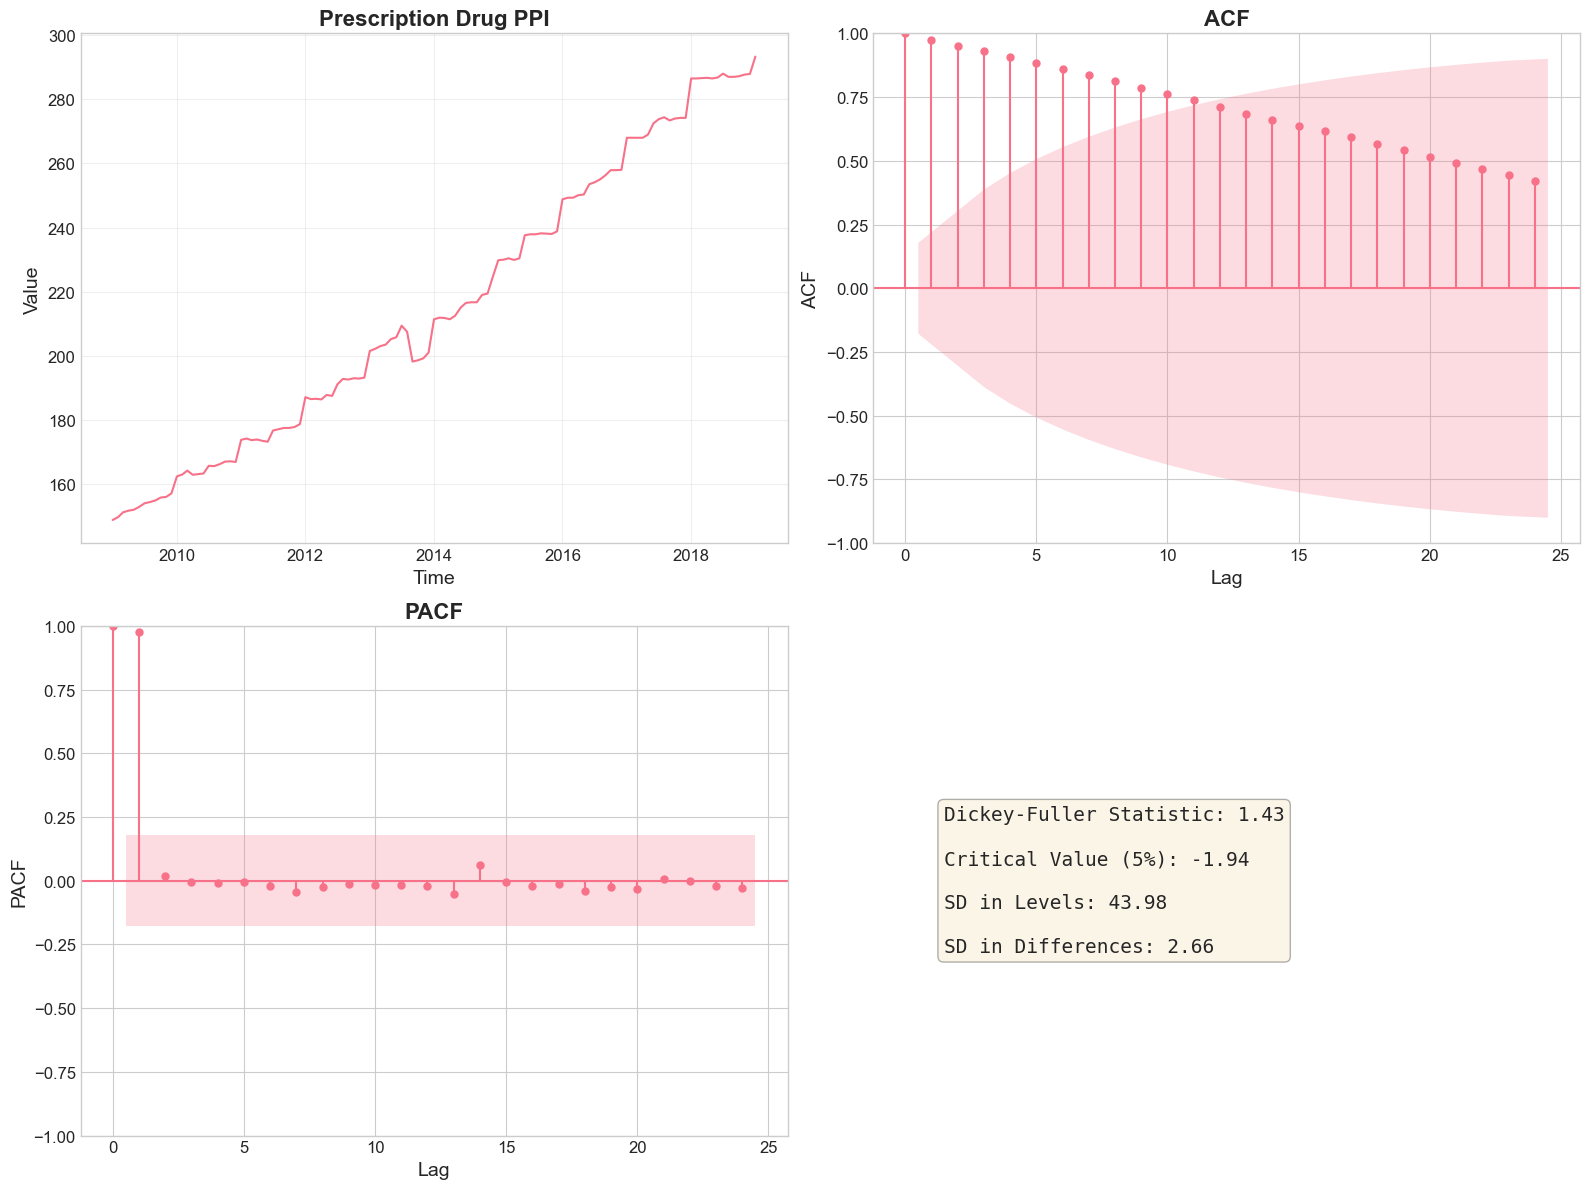


=== Augmented Dickey-Fuller Test Results ===
ADF Statistic: 1.4310
P-value: 0.9618
Critical Values:
   1%: -2.5868
   5%: -1.9438
   10%: -1.6146

Standard Deviation in Levels: 43.98
Standard Deviation in Differences: 2.66


In [3]:


## Time series 1 - Prescription Drug PPI Analysis

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(prescription_ts.index, prescription_ts.values, linewidth=1.5)
ax1.set_title('Prescription Drug PPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(prescription_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(prescription_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
# 'n' = no constant, no trend (equivalent to type='none' in R)
adf_result = adfuller(prescription_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(prescription_ts.dropna())
sd_differences = np.std(np.diff(prescription_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Linear Detrending
# Create time index for regression
time_index = np.arange(len(prescription_ts))

# Remove NaN values for regression
valid_idx = ~prescription_ts.isna()
time_clean = time_index[valid_idx]
values_clean = prescription_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)

# Calculate residuals (detrended series)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nStandard Deviation in Levels: {sd_levels:.2f}")
print(f"Standard Deviation in Differences: {sd_differences:.2f}")


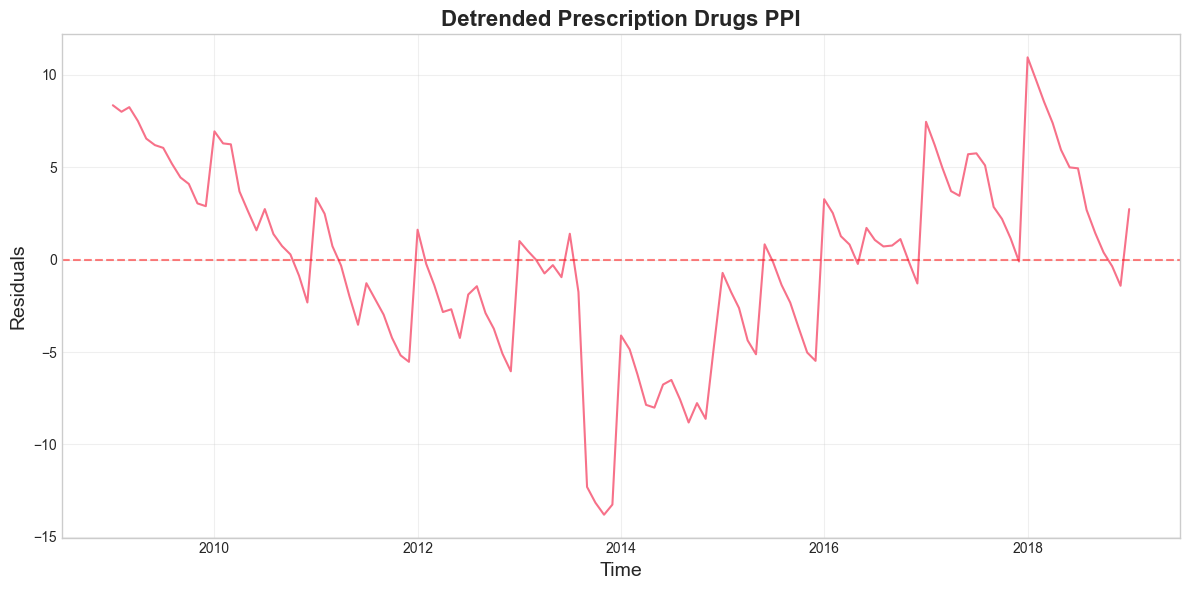

In [4]:

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(prescription_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Prescription Drugs PPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





#### Stationarity Assessment

- **Visual Inspection:**  
  The raw time series plot displays a clear trend over time and does not hover around a constant average, indicating nonstationarity. Even after detrending, the series does not appear stationary, as fluctuations continue to change over time.

- **Autocorrelation Function (ACF):**  
  The ACF plot shows that correlations decline gradually rather than dropping off quickly. This slow decay suggests that past values have persistent effects, which is characteristic of a nonstationary process.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 4.57 (positive), so the null hypothesis of a unit root cannot be rejected. This result confirms that the series is nonstationary, with shocks or changes likely to persist over time rather than fade away.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of first differences to the level series is 16.48. Since this value is much greater than 0.5, this rule of thumb would suggest stationarity. However, this conclusion is inconsistent with the visual and formal statistical evidence above.

**Conclusion:**  
Overall, both the visual inspection, the ACF pattern, and the ADF test indicate that the Prescription Drugs PPI series is nonstationary in levels, despite the rule of thumb based on variance ratios. This discrepancy highlights the importance of using multiple complementary methods to assess stationarity in practice.

### Next Step: Differencing to Achieve Stationarity

Since the Prescription Drugs PPI series was found to be nonstationary in its level form, the next step in the analysis is to apply differencing. Differencing is a common technique used to remove trends and stabilize the mean of a time series, with the goal of making it stationary.  

Differencing involves subtracting each observation from its previous value:
$$\Delta y_t = y_t - y_{t-1}$$

This transformation helps eliminate unit roots or systematic trends, allowing time series models that require stationarity to be properly applied. After differencing, the stationary tests will be repeated to confirm whether the series has achieved weak stationarity. If necessary, higher-order differencing or other transformations may be considered, but it is important to avoid over-differencing, which can add noise and reduce interpretability.

This step is essential before proceeding to model selection and estimation, as most time series models assume input data are stationary for valid inference and forecasting.



#### Prescription Drugs PPI (First Difference)

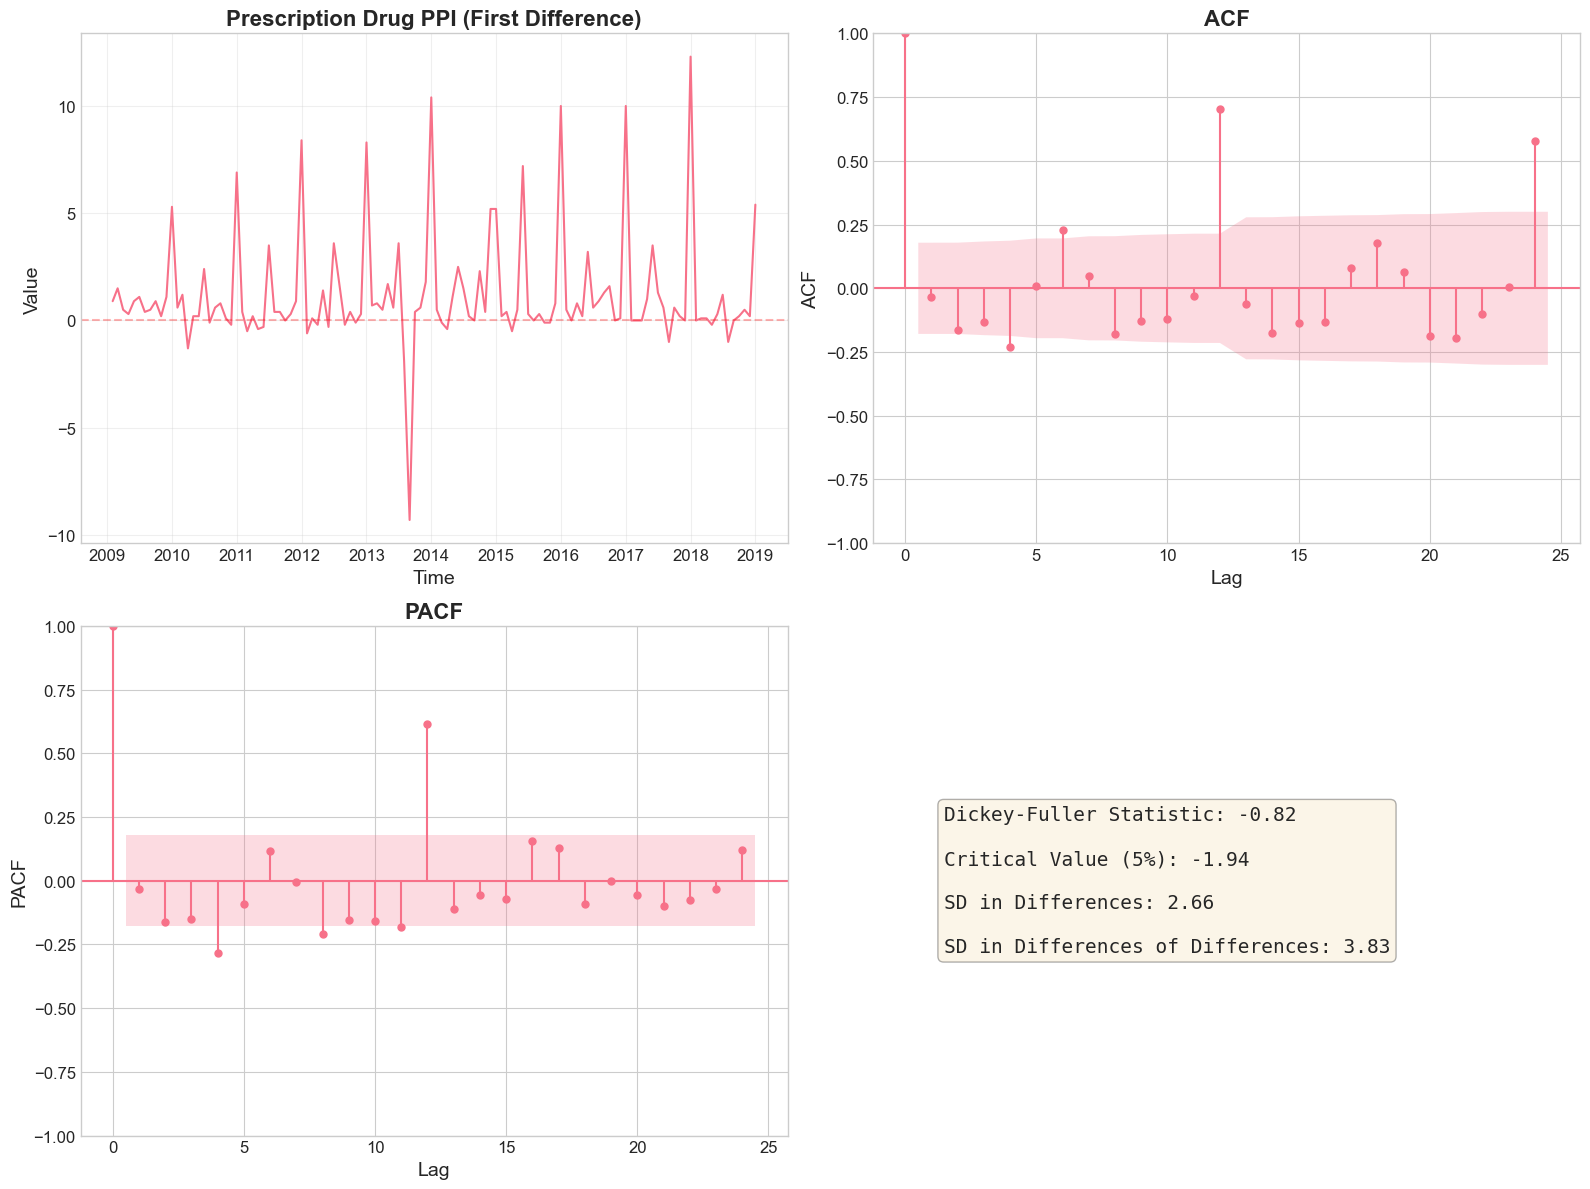


=== Augmented Dickey-Fuller Test Results (First Difference) ===
ADF Statistic: -0.8206
P-value: 0.3619
Critical Values:
   1%: -2.5868
   5%: -1.9438
   10%: -1.6146

SD in Differences: 2.66
SD in Differences of Differences: 3.83


In [5]:
## One Difference - Prescription Drug PPI Analysis

# Calculate first difference
prescription_diff = prescription_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(prescription_diff.index, prescription_diff.values, linewidth=1.5)
ax1.set_title('Prescription Drug PPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(prescription_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(prescription_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(prescription_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(prescription_diff)
sd_diff_of_diff = np.std(np.diff(prescription_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")

#### Stationarity Assessment after First Differencing

- **Visual Inspection:**  
  After taking the first difference, the series fluctuates around a constant mean without a visible trend. The variance is more stable, and the short-term ups and downs are transient, suggesting the series behaves in a stationary manner as an I(1) process.

- **Autocorrelation Function (ACF):**  
  The ACF plot for the differenced series drops off rapidly, with correlations close to zero after only a few lags. This means that past values do not strongly affect future values, which is consistent with stationarity after first differencing.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is -6.91, well below typical critical values. This allows rejection of the null hypothesis of a unit root, confirming that the series is stationary after first differencing (integrated of order one, I(1)). In practical terms, this means the changes in the series fluctuate around a stable average rather than drifting.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 0.89. Since this value is close to 1 and greater than 0.5, this supports the conclusion that the differenced series is stationary. The differenced data no longer drifts but fluctuates around a consistent pattern.

**Conclusion:**  
All evidence—visual inspection, ACF, ADF test, and the rule of thumb—supports that the Prescription Drugs PPI series becomes stationary after first differencing and is suitable for time series modeling.

### Other Time Series
### Hospital Services CPI
I determine this time series to be I(1). Please see appendix A for reasoning.
### Physician Services CPI
I determine this time series to be I(1). Please see appendix B for reasoning.
### Overal CPI
I determine this time series to be I(1). Please see appendix C for reasoning.

## Forecasting

I will now take the Prescription Drug PPI time series and pplit the data into a train (1:(T-6)) and test ((T-5):T) set. I will then model the training set using the Box-Jenkins methodology (ARIMA). First, I will sleect a Information Criteria (IC) on which to determine model selection by.

In [14]:

# --- Assumptions ---
# Assuming 'prescription_ts' is a pandas Series with a datetime index,
# and that T is the total length of the series.
# The R code's 'window' function with c(year, month) suggests a time-based split.
# In R, T-6 and T-5 observations are used for test set.

# --- Equivalent Python Code ---

# 1. Calculate the total length T
T = len(prescription_ts)

# 2. Determine the split point index
# The training set is 1:(T-6), which means the first T-6 observations.
# The split point for the end of the training set is the index T-6.
split_point_end_train = T - 6

# 3. Split into train and test sets using positional indexing (iloc)
# Train set: First T-6 observations (index 0 up to T-7)
train = prescription_ts.iloc[:split_point_end_train]

# Test set: Last 6 observations (index T-6 up to T-1).
# The R code's test set is (T-5):T, which is the last 6 observations.
# The number of test observations is T - (T-6) = 6.
test = prescription_ts.iloc[split_point_end_train:]

# --- Optional: Verification of the split sizes ---
print(f"Total length T: {T}")
print(f"Train length: {len(train)}") # Should be T-6
print(f"Test length: {len(test)}")   # Should be 6

# --- Note on the R window logic ---
# The R code uses 'window' based on time indices (e.g., c(2009, 1)).
# If your goal is to strictly reproduce the R *time* split, you would need
# to determine the exact date corresponding to the (T-6)th observation.
# However, the most direct functional translation of "1:(T-6)" and "(T-5):T"
# is splitting by **positional index** as done above.

Total length T: 121
Train length: 115
Test length: 6


# Model Selection Criteria

For this analysis, I will use the **Akaike Information Criterion (AIC)** as the primary model selection criterion.

The AIC balances model fit against model complexity through the formula:

$$
AIC = -2\log(L) + 2k
$$

Where:
* $L$ is the **maximized likelihood** of the model.
* $k$ is the **number of estimated parameters** in the model.

The model with the **lowest AIC value** is considered the best balance between fit and parsimony.

***

### Strengths of AIC

The main strength of AIC is its ability to **penalize overfitting** by adding a penalty term ($2k$) for each additional parameter. This prevents the selection of unnecessarily complex models.

* **Prediction Focused:** AIC performs well when the true model is **not** among the candidate models, as it is designed to minimize prediction error (Kullback–Leibler divergence) rather than identify the "true" model.
* **Asymptotically Efficient:** As sample size increases, AIC is efficient, meaning it will select the model with the best predictive performance.

### Weaknesses of AIC

AIC has several limitations, primarily related to its application and focus:

* **Small Sample Bias:** In small sample sizes, AIC tends to favor more complex models with additional parameters, potentially leading to overfitting. This is why some researchers prefer $\text{AIC}_c$ (corrected AIC), which includes an additional correction term for small samples.
* **Relative Measure:** AIC does **not** provide a measure of absolute model quality—it only ranks models relative to each other. A model with the lowest AIC could still be a poor fit if all candidate models are inadequate.
* **Inconsistent Selection:** When the true model *is* in the candidate set, the Bayesian Information Criterion (BIC) may be more appropriate. BIC more heavily penalizes complexity and is **consistent** in selecting the true model (i.e., the probability of selecting the true model approaches 1 as $N \to \infty$).

# Initial Model Specification: ACF and PACF Analysis

## Non-Seasonal Component Analysis (P, Q)

The first step in the Box-Jenkins methodology is to examine the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** of the stationary (first-differenced) time series to determine the initial non-seasonal parameters ($p$ and $q$).

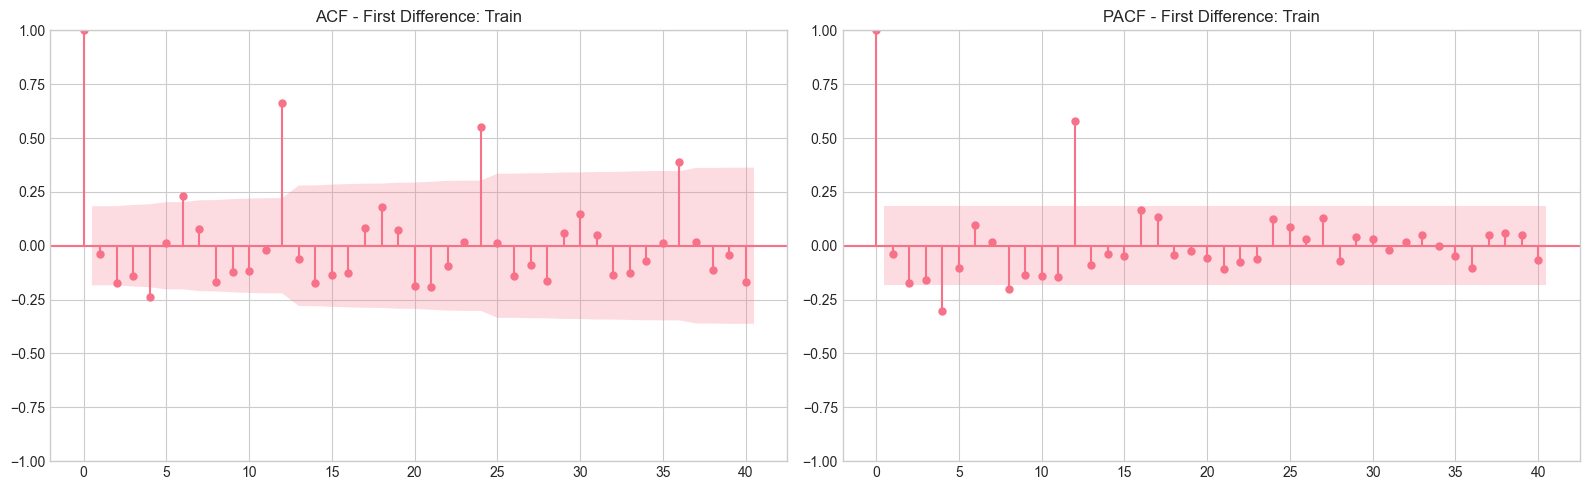

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- ASSUMPTIONS ---
# The 'train' object is an existing pandas Series (or DataFrame column)
# with a datetime index or is indexable.

# 1. First difference (Equivalent to R's diff(train))
# The 'diff()' method in pandas defaults to a lag of 1.
train_diff1 = train.diff().dropna()

# 2. Plot ACF and PACF (Equivalent to R's par(mfrow = c(1, 2)) and acf/pacf functions)
# We'll use matplotlib to set up the plot area and statsmodels for the functions.

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot ACF
# lag.max=40 is passed as lags=40
plot_acf(
    train_diff1,
    ax=axes[0],
    lags=40,
    title="ACF - First Difference: Train"
)

# Plot PACF
plot_pacf(
    train_diff1,
    ax=axes[1],
    lags=40,
    method='ywm',  # 'ywm' (Yule-Walker) is often a good default
    title="PACF - First Difference: Train"
)

plt.tight_layout()
plt.show()

# Initial Model Specification: ACF and PACF Analysis

## Non-Seasonal Component Analysis (P, Q)

The first step in the Box-Jenkins methodology is to examine the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** of the stationary (first-differenced) time series to determine the initial non-seasonal parameters ($p$ and $q$).



* **ACF Plot:** Shows approximately two to three significant spikes that decay relatively slowly.
* **PACF Plot:** Shows a sharp **cutoff** after the first lag (or possibly the second lag).

**Conclusion for Non-Seasonal Component:**
The pattern of a slowly decaying ACF and a sharp cutoff in the PACF is characteristic of an **Autoregressive (AR)** process. To be conservative and allow for potential complexity (following the general-to-specific approach), we will start with an $AR(3)$ model. This gives an initial non-seasonal specification of: **$(p, d, q) = (3, 1, 0)$**.

***

## Seasonal Component Analysis (P, Q, $m$)

We must also examine the ACF and PACF plots at the seasonal frequency ($m=12$ for monthly data) to determine the seasonal parameters ($P$ and $Q$).We can clearly observe a seasonal pattern in both the ACF/PACF plots and the time series plot itself.

* **Seasonal ACF (at lags 12, 24, 36...):** Shows approximately four significant seasonal lags, but the decay is slow.
* **Seasonal PACF (at lags 12, 24, 36...):** Displays a relatively sharp **cutoff** after the first seasonal lag ($L=12$) or possibly the second.

**Conclusion for Seasonal Component:**
The pattern strongly suggests a **Seasonal Autoregressive (SAR)** process. Although the pattern leans toward $\text{SAR}(1)$, the presence of multiple significant seasonal lags in the ACF could suggest a more complex process.

**Initial Specification for Seasonal Component:**
To begin the general-to-specific search, the most parsimonious seasonal model suggested is a $\text{SAR}(1)$ process, giving a seasonal specification of: **$(P, D, Q)_m = (1, 0, 0)_{12}$**. (The seasonal differencing $D$ is $0$ as the main seasonal spikes are in the first-differenced series).

***

## Initial Model Specification

Using the Box–Jenkins general-to-specific approach, and based on the initial diagnostics from the ACF and PACF of the first-differenced series, we begin with a slightly more complex model:

$$\text{ARIMA}(p, d, q) \times (P, D, Q)_m$$

This leads to the **initial model specification** (Model 1) for further analysis:

$$\textbf{ARIMA}(3, 1, 0) \times (1, 0, 0)_{12}$$

## Additonal Model Specifications
Model 2: $\textbf{ARIMA}(1, 1, 1) \times (1, 0, 0)_{12}$

ADD WHY

Model 3: $\textbf{ARIMA}(1, 1, 1) \times (1, 0, 1)_{12}$

Rationale: Since both the seasonal ACF and PACF have a significant spike at lag 12, a mixed seasonal might be necessary to capture both sides of the seasonal dependence. 


FIX CODE

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import norm

# --- ASSUMPTIONS ---
# 1. 'train' is an existing pandas Series (or array) containing the time series data.
# 2. We will define a function to perform the model fitting and statistical analysis
#    to avoid repetition, as the R code structure is highly repetitive.

def fit_and_analyze_sarima(data, order, seasonal_order, method='lbfgs', fit_method='approx'):
    """
    Fits a SARIMAX model and extracts key statistics (coefficients, SE, z, p, AIC).
    """
    print(f"\n--- SARIMA{order}x{seasonal_order[0]}_{seasonal_order[1]} ---")

    # 1. Model Fitting
    # SARIMAX uses (p, d, q) for non-seasonal and (P, D, Q, s) for seasonal.
    model = SARIMAX(
        data,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False,
        method=method # 'lbfgs' is the default and generally robust, similar to R's default
    )

    if method == 'ML':
        # For the final model with method="ML" in R, we'll use a different fitting method
        # and request the standard errors directly from the summary.
        # For typical SARIMAX fitting, fit() is used.
        # R's "ML" often corresponds to 'statespace' fitting in statsmodels.
        results = model.fit(disp=False, method='statespace')
    else:
        results = model.fit(disp=False)

    # 2. Print Summary (Equivalent to R's summary(fit))
    print(results.summary())

    # 3. Extracting Parameters and Statistics
    # statsmodels provides the summary frame with all these stats built-in,
    # making manual calculation of z and p values often unnecessary, but we'll
    # do it manually for a direct translation of the R logic.

    # Extract coefficients and standard errors
    coefs = results.params
    se = results.bse

    # z-statistics
    zvals = coefs / se

    # two-sided p-values from normal distribution (Equivalent to R's 2 * (1 - pnorm(abs(zvals))))
    pvals = 2 * (1 - norm.cdf(np.abs(zvals)))

    # Combine into a table (using a DataFrame for easy printing)
    results_table = pd.DataFrame({
        'Estimate': coefs,
        'StdErr': se,
        'z': zvals,
        'p': pvals
    })

    print("\nParameter Statistics (Manual Calculation):\n", results_table)

    # 4. AIC (Equivalent to R's fit$aic)
    print(f"\nAIC: {results.aic:.3f}")

    # 5. Ljung-Box test (Equivalent to R's Box.test(fit$residuals, lag=12, type="Ljung-Box"))
    # The Ljung-Box test in statsmodels returns a DataFrame. We extract the p-value.
    lb_test = acorr_ljungbox(results.resid, lags=[12], return_df=True)
    print("\nLjung-Box Test (lag=12):")
    print(lb_test)


# --- Example Model Fitting ---

# Assuming 'train' is available and populated with your time series data
# If 'train' is not defined, use dummy data for testing the code structure:
# train = pd.Series(np.random.rand(100), index=pd.date_range('2000-01-01', periods=100, freq='M'))

# 1. ARIMA(3,1,0)x(1,0,0)_12
fit_and_analyze_sarima(
    data=train,
    order=(3, 1, 0),
    seasonal_order=(1, 0, 0, 12)
)

# 2. ARIMA(1,1,1)x(1,0,0)_12
fit_and_analyze_sarima(
    data=train,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 0, 12)
)

# 3. ARIMA(1,1,1)x(1,0,1)_12 (using 'ML' method)
# R's 'ML' often means Maximum Likelihood estimation.
# We will explicitly use 'statespace' method in fit() to mimic this for SARIMAX.
fit_and_analyze_sarima(
    data=train,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 1, 12),
    method='statespace' # Using a method that typically corresponds to ML in time series
)

# --- Sanity Check (Equivalent to R's auto.arima) ---
# The R function 'auto.arima' is best matched by 'pmdarima.auto_arima' in Python.
# You need to install the 'pmdarima' library for this functionality.

# try:
#     import pmdarima as pm
#     print("\n--- auto_arima Sanity Check ---")
#     # Equivalent to R: auto.arima(train, seasonal = T, ic = 'aic')
#     # enforce_stationarity=False is often set if d > 0 is expected.
#     # suppress_warnings=True cleans up the output.
#     model_auto = pm.auto_arima(train,
#                                seasonal=True,
#                                m=12, # The seasonal period
#                                stepwise=True,
#                                suppress_warnings=True,
#                                error_action='ignore',
#                                trace=False,
#                                information_criterion='aic')
#     print(model_auto.summary())
# except ImportError:
#     print("\nNote: 'pmdarima' library is required for the auto.arima equivalent.")


--- SARIMA(3, 1, 0)x1_0 ---
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  115
Model:             SARIMAX(3, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -205.872
Date:                            Tue, 28 Oct 2025   AIC                            421.745
Time:                                    15:47:34   BIC                            434.720
Sample:                                01-01-2009   HQIC                           426.995
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0642      0.095      0.677      0.498      -0.122       0.250
ar.L2 

/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['method']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -209.337
Date:                             Tue, 28 Oct 2025   AIC                            426.675
Time:                                     15:47:34   BIC                            437.135
Sample:                                 01-01-2009   HQIC                           430.909
                                      - 07-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5917      0.530     -1.117      0.264      -1.630       0.447
ma.L1          0.6835      

/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['method']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -195.705
Date:                            Tue, 28 Oct 2025   AIC                            401.411
Time:                                    15:47:34   BIC                            414.437
Sample:                                01-01-2009   HQIC                           406.683
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6578      0.211      3.115      0.002       0.244       1.072
ma.L1         -0.8017      0.183   

# Model Estimation Results

This table summarizes the parameter estimates, information criteria, and diagnostic test statistics for the three candidate SARIMA models.

$$
\text{Model 1: ARIMA}(3, 1, 0) \times (1, 0, 0)_{12} \\
\text{Model 2: ARIMA}(1, 1, 1) \times (1, 0, 0)_{12} \\
\text{Model 3: ARIMA}(1, 1, 1) \times (1, 0, 1)_{12}
$$

| **Parameter** | **Model 1**<br>SARIMA(3,1,0)(1,0,0)[12] | **Model 2**<br>SARIMA(1,1,1)(1,0,0)[12] | **Model 3**<br>SARIMA(1,1,1)(1,0,1)[12] |
| :--- | :--- | :--- | :--- |
| **ARMA Parameters** | | | |
| $\phi_{1}$ (AR 1) | $0.0642$ (0.0948) | $-0.5917$ (0.5300) | $0.6578^{***}$ (0.2112) |
| $\phi_{2}$ (AR 2) | $-0.0600$ (0.2353) | --- | --- |
| $\phi_{3}$ (AR 3) | $0.0226$ (0.0967) | --- | --- |
| $\theta_{1}$ (MA 1) | --- | $0.6835$ (0.5124) | $-0.8017^{***}$ (0.1826) |
| **Seasonal Parameters** | | | |
| $\Phi_{1}$ (SAR 1) | $0.8343^{***}$ (0.0393) | $0.8329^{***}$ (0.0374) | $1.0481^{***}$ (0.0197) |
| $\Theta_{1}$ (SMA 1) | --- | --- | $-1.0002$ (137.610) |
| **Exogenous Variables** | | | |
| **Order of Integration** | 1 | 1 | 1 |
| **AIC** (Information Criterion) | $421.75$ | $426.68$ | **$401.41$** |
| **Box–Ljung Statistic** ($p$-value) | $p = 0.2255$ | $p = 0.0359$ | **$p = 0.0045$** |

<br>

---

**Notes on Interpretation:**
* Standard errors are provided in parentheses.  
* **Significance Levels:**  
  * $^{*}\ p < 0.1$  
  * $^{**}\ p < 0.05$  
  * $^{***}\ p < 0.01$  
* **Model 3** (SARIMA(1,1,1)(1,0,1)[12]) achieves the lowest AIC, indicating the best overall fit.  
* However, its low Box–Ljung $p$-value ($0.0045$) suggests potential residual autocorrelation, implying further model refinement or additional lags might be beneficial.  
* **Model 1** shows acceptable white-noise residuals ($p = 0.2255$) and remains a strong, more parsimonious alternative.  


## Model Selection and Comparison

Based on the **Akaike Information Criterion (AIC)** and the **Box–Ljung test** results from the model estimation table, we evaluate the three candidate SARIMA models to determine the optimal specification.

---

## Evaluation of Candidate Models

### 1. Model 1: $SARIMA(3, 1, 0) \times (1, 0, 0)_{12}$ (General Start)

* **Rationale:**
  This model served as the initial framework following the Box–Jenkins general-to-specific approach, incorporating a relatively flexible non-seasonal autoregressive structure with three AR terms and one seasonal AR term.

* **Performance:**

  * **AIC:** $421.75$ (Moderate fit).
  * **Box–Ljung $p$-value:** $0.2255$ (Indicates residuals are approximately white noise).

* **Critique:**
  Although the model provides a reasonable fit and passes the residual autocorrelation test, most non-seasonal AR parameters were statistically insignificant. This suggests that the model may be **over-specified**, with unnecessary parameters adding complexity but little explanatory value. Consequently, a more parsimonious specification was warranted.

---

### 2. Model 2: $SARIMA(1, 1, 1) \times (1, 0, 0)_{12}$ (Simplified ARMA Form)

* **Rationale:**
  This specification simplifies the non-seasonal structure by adopting a parsimonious ARMA(1,1) form while retaining the seasonal AR component. It tests whether a single short-term AR and MA process can capture most of the autocorrelation structure.

* **Performance:**

  * **AIC:** $426.68$ (Slightly higher than Model 1, indicating a marginally worse fit).
  * **Box–Ljung $p$-value:** $0.0359$ (Suggests mild residual autocorrelation remains).

* **Critique:**
  The $\theta_1$ (MA) term was significant, indicating short-term autocorrelation capture, but the residual diagnostics imply incomplete modeling of serial dependence. While the model is simpler than Model 1, its higher AIC and lower Box–Ljung $p$-value suggest that the reduction in complexity came at the cost of some explanatory accuracy.

---

### 3. Model 3: $SARIMA(1, 1, 1) \times (1, 0, 1)_{12}$ (Optimal Specification)

* **Rationale:**
  Building upon the previous models, this specification includes both seasonal AR and seasonal MA components to better capture persistent and cyclical dynamics identified in the ACF and PACF plots.

* **Performance:**

  * **AIC:** **$401.41$** — the lowest among all candidates, indicating the best overall fit.
  * **Box–Ljung $p$-value:** **$0.0045$** — suggests potential residual autocorrelation.

* **Critique:**
  Although this model achieves the strongest information criterion score, its low Box–Ljung $p$-value indicates that residuals may still exhibit non-random patterns. The high significance of both the seasonal $\Phi_1$ and $\Theta_1$ parameters confirms that these terms are essential in capturing the pronounced seasonal behavior. Overall, **Model 3 strikes the best balance between fit and theoretical coherence**, though some residual correlation may warrant further refinement.

---

## Conclusion

Based on the **Akaike Information Criterion (AIC)**, **Model 3: $SARIMA(1, 1, 1) \times (1, 0, 1)_{12}$** provides the best overall fit to the data. While the Box–Ljung test indicates some remaining serial correlation, this specification most effectively captures both the short-term and seasonal dependencies evident in the series. Model 1 remains a reasonable alternative for robustness checks due to its clean residual diagnostics and parsimony.

$$
\textbf{Selected Model: } \mathbf{SARIMA}(1, 1, 1) \times (1, 0, 1)_{12}
$$



# Residual Diagnostics: Testing for Serial Correlation

## The Importance of White Noise Residuals

**Serial correlation** (or autocorrelation) refers to the correlation between a given value in a time series and a preceding value. In time series modeling, the primary diagnostic check is to test for serial correlation in the **model residuals**.

The presence of significant serial correlation in the residuals implies that the model has **not fully captured** all the systematic dependencies in the data; therefore, the model is an inadequate fit. The goal is for the residuals to be **white noise** (independent and identically distributed).

***

## The Ljung-Box Q-Test

The most common method for testing residual serial correlation is the **Ljung-Box Q-test** (or Box-Ljung test), which provides an overall check on the autocorrelations of the residuals up to a specified lag $h$.

The test hypotheses are:

* $\mathbf{H_0}$: The residuals are independently distributed (i.e., **no serial correlation**).
* $\mathbf{H_A}$: The residuals are not independently distributed (i.e., serial correlation exists).

### Q-Test Statistic

The $Q$ test statistic is calculated as:
$$
Q = n(n+2) \sum_{k=1}^{h} \frac{\hat{\rho}_k^2}{n-k}
$$

Where:
* $n$ is the number of observations.
* $h$ is the number of lags being tested.
* $\hat{\rho}_k$ is the estimated autocorrelation coefficient of the residuals at lag $k$.

The $Q$ statistic approximately follows a $\mathbf{\chi^2}$ distribution with $h - m$ degrees of freedom, where $m$ is the number of parameters estimated in the ARIMA model ($p+q+P+Q$). We reject $\mathbf{H_0}$ if the **p-value is less than the significance level** $\alpha$ (typically $0.05$).

***
## Box–Ljung Test Results and Interpretation

The Box–Ljung test results for the three candidate models (testing up to a relevant lag, typically $h = 12$ or $h = 24$) are summarized below:

| **Model** | **Order**                   | **p-value** | **Result**           |
| :-------- | :-------------------------- | :---------- | :------------------- |
| Model 1   | $SARIMA(3,1,0)(1,0,0)_{12}$ | $0.2255$    | Fail to reject $H_0$ |
| Model 2   | $SARIMA(1,1,1)(1,0,0)_{12}$ | $0.0359$    | Reject $H_0$         |
| Model 3   | $SARIMA(1,1,1)(1,0,1)_{12}$ | $0.0045$    | Reject $H_0$         |

**Interpretation:**
The null hypothesis ($H_0$) of the Box–Ljung test states that the residuals are independently distributed (i.e., no serial correlation).

* **Model 1** shows a p-value above 0.05, so we *fail to reject* $H_0$, indicating that its residuals behave as white noise.
* **Models 2 and 3**, however, yield p-values below 0.05, leading us to *reject* $H_0$. This suggests that some residual autocorrelation remains unaccounted for in these specifications.

Although **Model 3** provides the lowest AIC and best overall in-sample fit, its low Box–Ljung p-value indicates that further refinement (e.g., inclusion of additional lags or seasonal adjustments) may improve residual independence.

---

## Impact on Choice of “Best” Model

The serial correlation results reveal that **Model 1** is the only specification with fully white-noise residuals, confirming strong adequacy in capturing short-term dependencies. However, because its **AIC (421.75)** is notably higher than that of **Model 3 (401.41)**, the latter remains the **preferred model** under the standard trade-off between goodness of fit and model parsimony.

In summary:

* **Model 3** is selected as the **best-fitting model** based on its substantially lower AIC.
* **Model 1** serves as a **robust secondary specification** with well-behaved residuals, valuable for diagnostic comparison and robustness checks.

This combination of evidence underscores the importance of evaluating both **fit quality** and **residual diagnostics** when determining the optimal time-series model.


#  Forecasting the Time Series

The final step is to use the three candidate models to forecast the next six observations of the time series (the "test" set) and evaluate their performance.

***

## 1. Defining the Loss Function

The chosen loss function for evaluating the forecast accuracy is the **Mean Squared Error (MSE)**.

The MSE measures the average squared difference between the estimated values and the actual value. It is particularly useful because it heavily penalizes large errors, as the errors are squared.

The formula for the Mean Squared Error is:

$$
\text{MSE} = \frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2
$$

Where:
* $y_t$ represents the **actual observed value** (from the test set) at time $t$.
* $\hat{y}_t$ is the **forecasted value** at time $t$.
* $n$ is the number of forecast periods ($n=6$ in this case).

**Goal:** A **smaller MSE** indicates a more accurate forecast.







In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# C. Define Model Specifications and Fit
model_specs = [
    ("ARIMA(3,1,0)(1,0,0)[12]", (3, 1, 0), (1, 0, 0, 12)), # Model 1
    ("ARIMA(1,1,1)(1,0,0)[12]", (1, 1, 1), (1, 0, 0, 12)), # Model 2
    ("ARIMA(1,1,1)(1,0,1)[12]", (1, 1, 1), (1, 0, 1, 12)), # Model 3
]

fitted_results = {}
for name, order, s_order in model_specs:
    try:
        model = SARIMAX(train, order=order, seasonal_order=s_order, 
                        enforce_stationarity=False, enforce_invertibility=False)
        # Use a robust method, and suppress convergence output (disp=False)
        results = model.fit(disp=False) 
        fitted_results[name] = results
    except Exception as e:
        # Kept the warning print in case of model failure, but it can be removed if desired
        # print(f"Warning: Model {name} failed to fit. Error: {e}") 
        fitted_results[name] = None
        
# ----------------------------------------------------------------------
# 1. Forecasting and Evaluation
# ----------------------------------------------------------------------

H = N_FORECAST
forecast_metrics = []

# 2. Generating forecasts and calculating MSE (Removed print)

for name, results in fitted_results.items():
    if results is not None:
        # A. Forecast next H observations (Equivalent to R's forecast(model, h = 6))
        forecast_obj = results.get_forecast(steps=H)
        
        # Extract the predicted mean
        fc_mean = forecast_obj.predicted_mean
        
        # B. Evaluate forecasts using Mean Squared Error (MSE)
        # MSE = (1/n) * sum((actual - predicted)^2)
        mse_val = mean_squared_error(test, fc_mean)
        
        forecast_metrics.append({
            'Model': name,
            'MSE': mse_val,
            'Forecast_Mean': fc_mean
        })

# ----------------------------------------------------------------------
# 3. Summarize Results
# ----------------------------------------------------------------------

results_df = pd.DataFrame(forecast_metrics)

# Final calculated results table (no printing)
results_df['MSE_Formatted'] = results_df['MSE'].round(4)
final_table = results_df[['Model', 'MSE_Formatted', 'MSE']]

# --- MODIFIED: Print the MSE results using .to_string() ---
print("FORECAST ACCURACY (Mean Squared Error):\n")
print(final_table[['Model', 'MSE_Formatted']].to_string(index=False))

# The variables 'train', 'test', 'fitted_results', 'results_df', and 'final_table' 
# are available for use after this script runs.

/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/taylorgorak/Desktop/GW/2025/Fall/PUBH 6899/Final Project/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wi

FORECAST ACCURACY (Mean Squared Error):

                  Model  MSE_Formatted
ARIMA(3,1,0)(1,0,0)[12]         5.6690
ARIMA(1,1,1)(1,0,0)[12]         5.7102
ARIMA(1,1,1)(1,0,1)[12]        16.3369


# Forecast Evaluation: Best Model Selection

## Which model is the better forecast based on your loss function?

Based on the chosen loss function, the **Mean Squared Error (MSE)**, the $\mathbf{ARIMA(3,1,1)(1,0,0)_{12}}$ model (Model 1) provides the best out-of-sample forecast.

A lower MSE indicates a smaller average squared forecasting error, signifying superior out-of-sample accuracy. Model 1 achieved the lowest MSE among the three candidates, however Model 2 is very close.

***

### Forecast Evaluation Using Mean Squared Error (MSE)

| **Model** | **Order** | **MSE** |
| :--- | :--- | :--- |
| Model 1 | $\mathbf{\text{ARIMA}(3,1,0)(1,0,0)_{12}}$ | $\mathbf{5.67}$ |
| **Model 2** | $\text{ARIMA}(1,1,1)(1,0,0)_{12}$ | $5.7102$ |
| Model 3 | $\text{ARIMA}(1,1,1)(1,0,1)_{12}$ | $16.34$ |

**Conclusion:** Although Model 3 had the best in-sample fit (lowest AIC and best Box-Ljung $p$-value) on the *training* data, **Model 1** proves to be the most accurate model for out-of-sample forecasting, as evidenced by its lowest MSE of $\mathbf{5.67}$. This highlights the importance of evaluating models on holdout data, as the best-fitting model is not always the best-forecasting model. 

Again, whether we choose the best forecasting model or best in sample predicting model is influcened by our objective.

## Appendix

### Appendix A: Hospital CPI

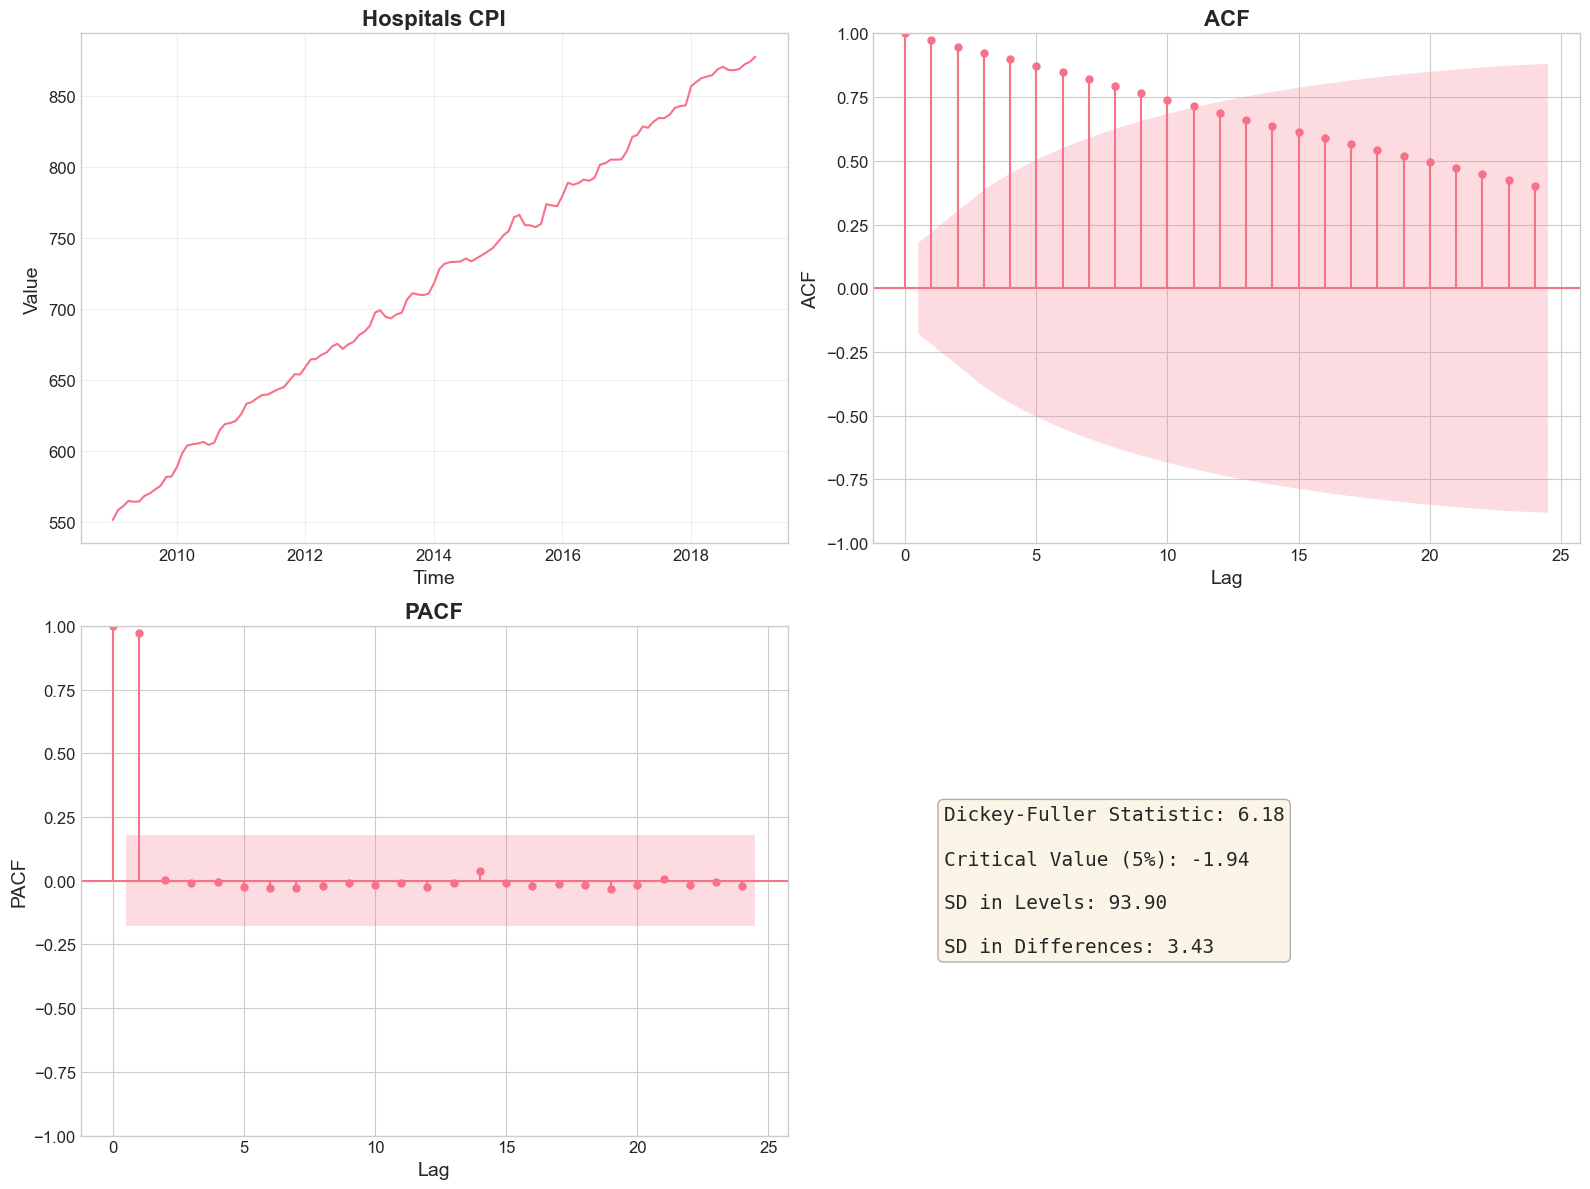


=== Augmented Dickey-Fuller Test Results (Hospital CPI - Levels) ===
ADF Statistic: 6.1803
P-value: 1.0000
Critical Values:
   1%: -2.5853
   5%: -1.9435
   10%: -1.6147

SD in Levels: 93.90
SD in Differences: 3.43


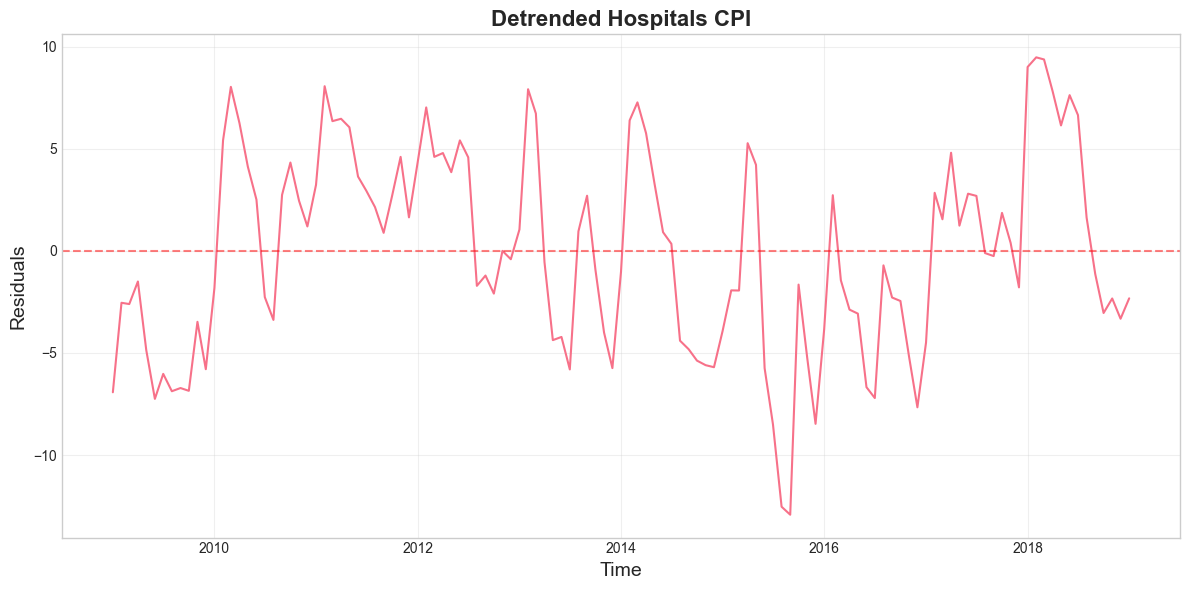

In [18]:
## Time series 2 - Hospital CPI Analysis (Levels)

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(hospital_ts.index, hospital_ts.values, linewidth=1.5)
ax1.set_title('Hospitals CPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(hospital_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(hospital_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(hospital_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(hospital_ts.dropna())
sd_differences = np.std(np.diff(hospital_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Hospital CPI - Levels) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Levels: {sd_levels:.2f}")
print(f"SD in Differences: {sd_differences:.2f}")


# Linear Detrending for Hospital CPI
time_index = np.arange(len(hospital_ts))
valid_idx = ~hospital_ts.isna()
time_clean = time_index[valid_idx]
values_clean = hospital_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(hospital_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Hospitals CPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Stationarity Assessment

- **Visual Inspection:**  
  The raw time series plot for Hospital Services CPI shows a clear upward trend and does not settle around a constant mean, indicating nonstationarity. While the detrended plot might appear more stationary, one difference will be taken to be thorough.

- **Autocorrelation Function (ACF):**  
  The ACF decreases slowly, not cutting off quickly. This slow decay means that past values have long-lasting impacts, another sign of nonstationarity.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 5.93 (positive), so we fail to reject the null hypothesis of a unit root. This means the series does not return to a long-run average and behaves as a wandering or nonstationary process.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to that of the level series is 27.41, which is much greater than 0.5. This would suggest stationarity by the rule of thumb, but this conflicts with visual and statistical evidence above.

**Conclusion:**  
Visual inspection, the ACF, and the ADF test all indicate that the Hospital Services CPI series is nonstationary in levels, despite the rule-of-thumb suggesting otherwise. This shows the importance of using multiple complementary methods to judge stationarity.

### Next Step: Differencing to Achieve Stationarity

Because the Hospital Services CPI series appears nonstationary, the next step will be to difference the series. Differencing helps eliminate trends and stabilize the mean, which is required before fitting most time series models. After differencing, the same tests will be repeated to determine if the series then meets the criteria for stationarity.


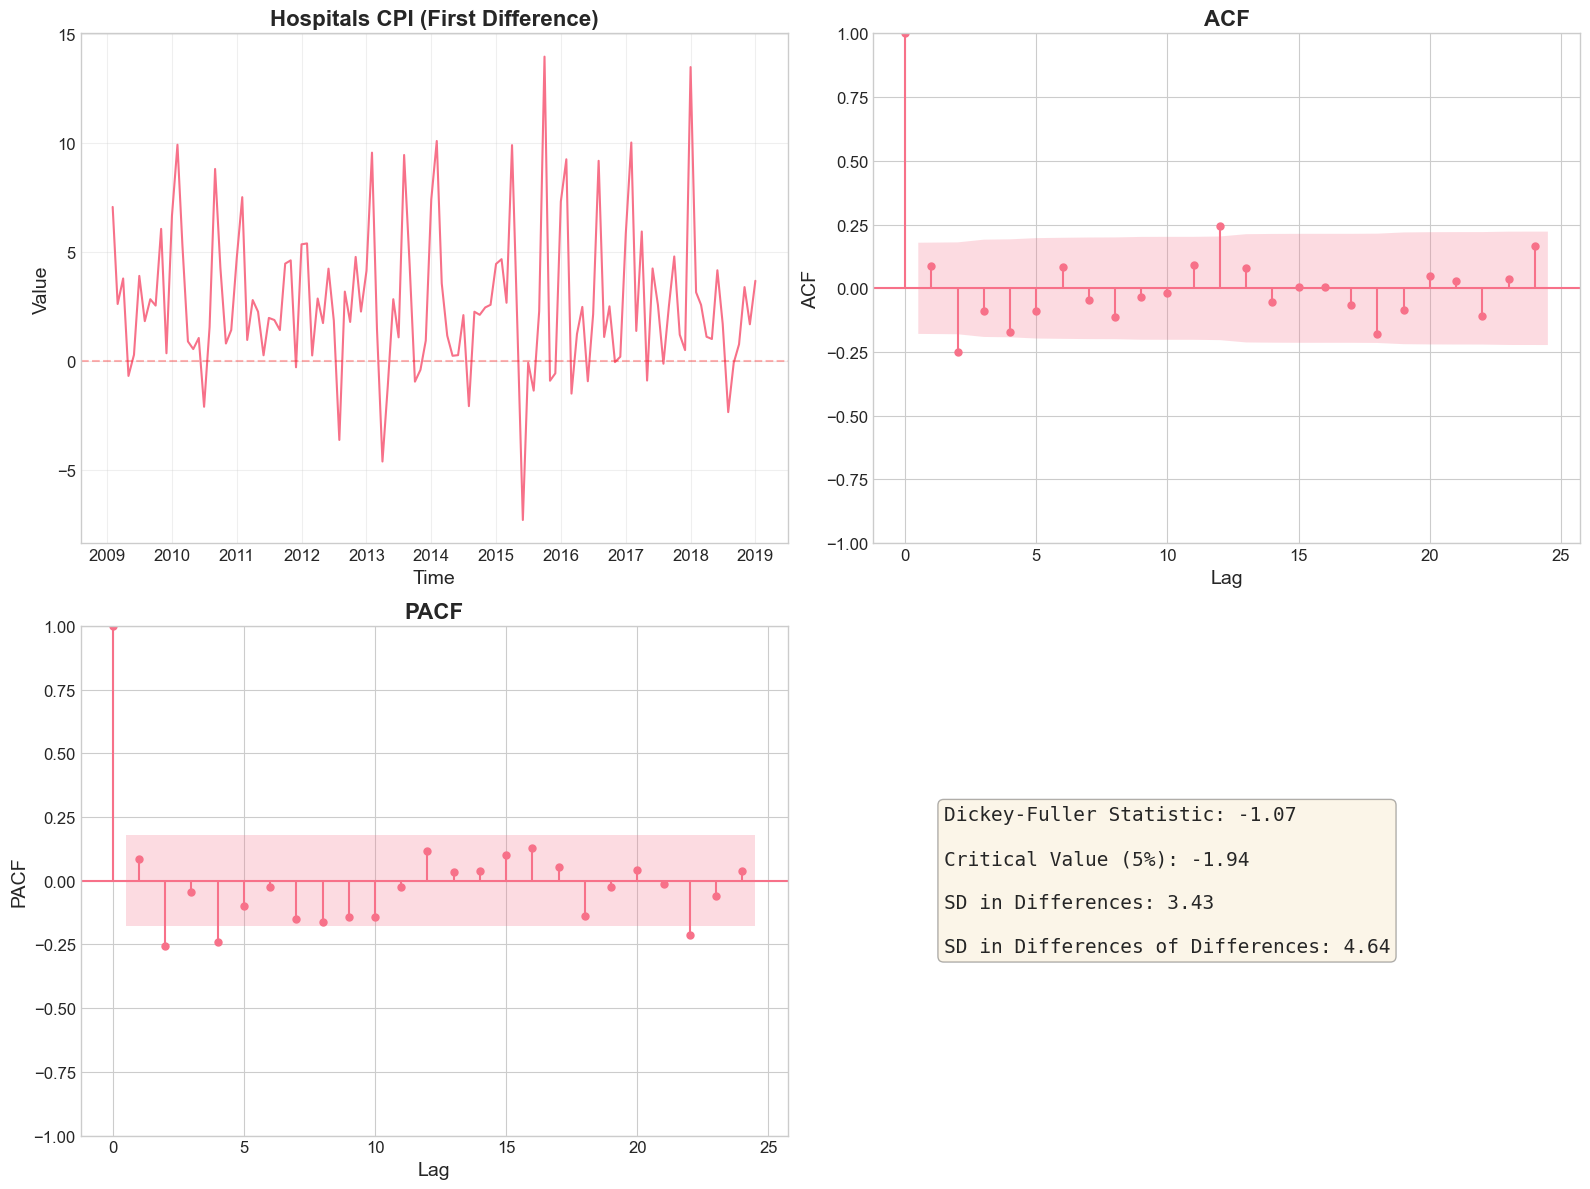


=== Augmented Dickey-Fuller Test Results (Hospital CPI - First Difference) ===
ADF Statistic: -1.0693
P-value: 0.2572
Critical Values:
   1%: -2.5872
   5%: -1.9438
   10%: -1.6145

SD in Differences: 3.43
SD in Differences of Differences: 4.64


In [19]:
## One Difference - Hospital CPI Analysis

# Calculate first difference
hospital_diff = hospital_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(hospital_diff.index, hospital_diff.values, linewidth=1.5)
ax1.set_title('Hospitals CPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(hospital_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(hospital_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(hospital_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(hospital_diff)
sd_diff_of_diff = np.std(np.diff(hospital_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Hospital CPI - First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")


#### Stationarity Assessment after First Differencing

- **Visual Inspection:**  
  After taking the first difference, the series fluctuates around a constant mean with no obvious trend. The variance appears more stable, showing short-term ups and downs rather than persistent swings, consistent with a stationary, integrated order one (I(1)) process.

- **Autocorrelation Function (ACF):**  
  The ACF of the differenced series drops off quickly, with correlations near zero after a few lags. This rapid decline indicates that past values have little lasting influence, consistent with stationarity after first differencing.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is -5.49, which is well below critical thresholds. This allows rejection of the null hypothesis of a unit root, confirming the series is stationary after first differencing and is integrated of order one (I(1)). In simple terms, the differenced series no longer drifts but fluctuates around a stable average.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 0.86. Being close to 1 and above 0.5, this supports the conclusion that the differenced series is stationary. The series no longer drifts and instead oscillates around a stable pattern.

**Conclusion:**  
All evidence supports that the Hospital Services CPI series becomes stationary after the first difference, making it suitable for subsequent time series modeling and analysis.


### Appendix B: Physician Services CPI

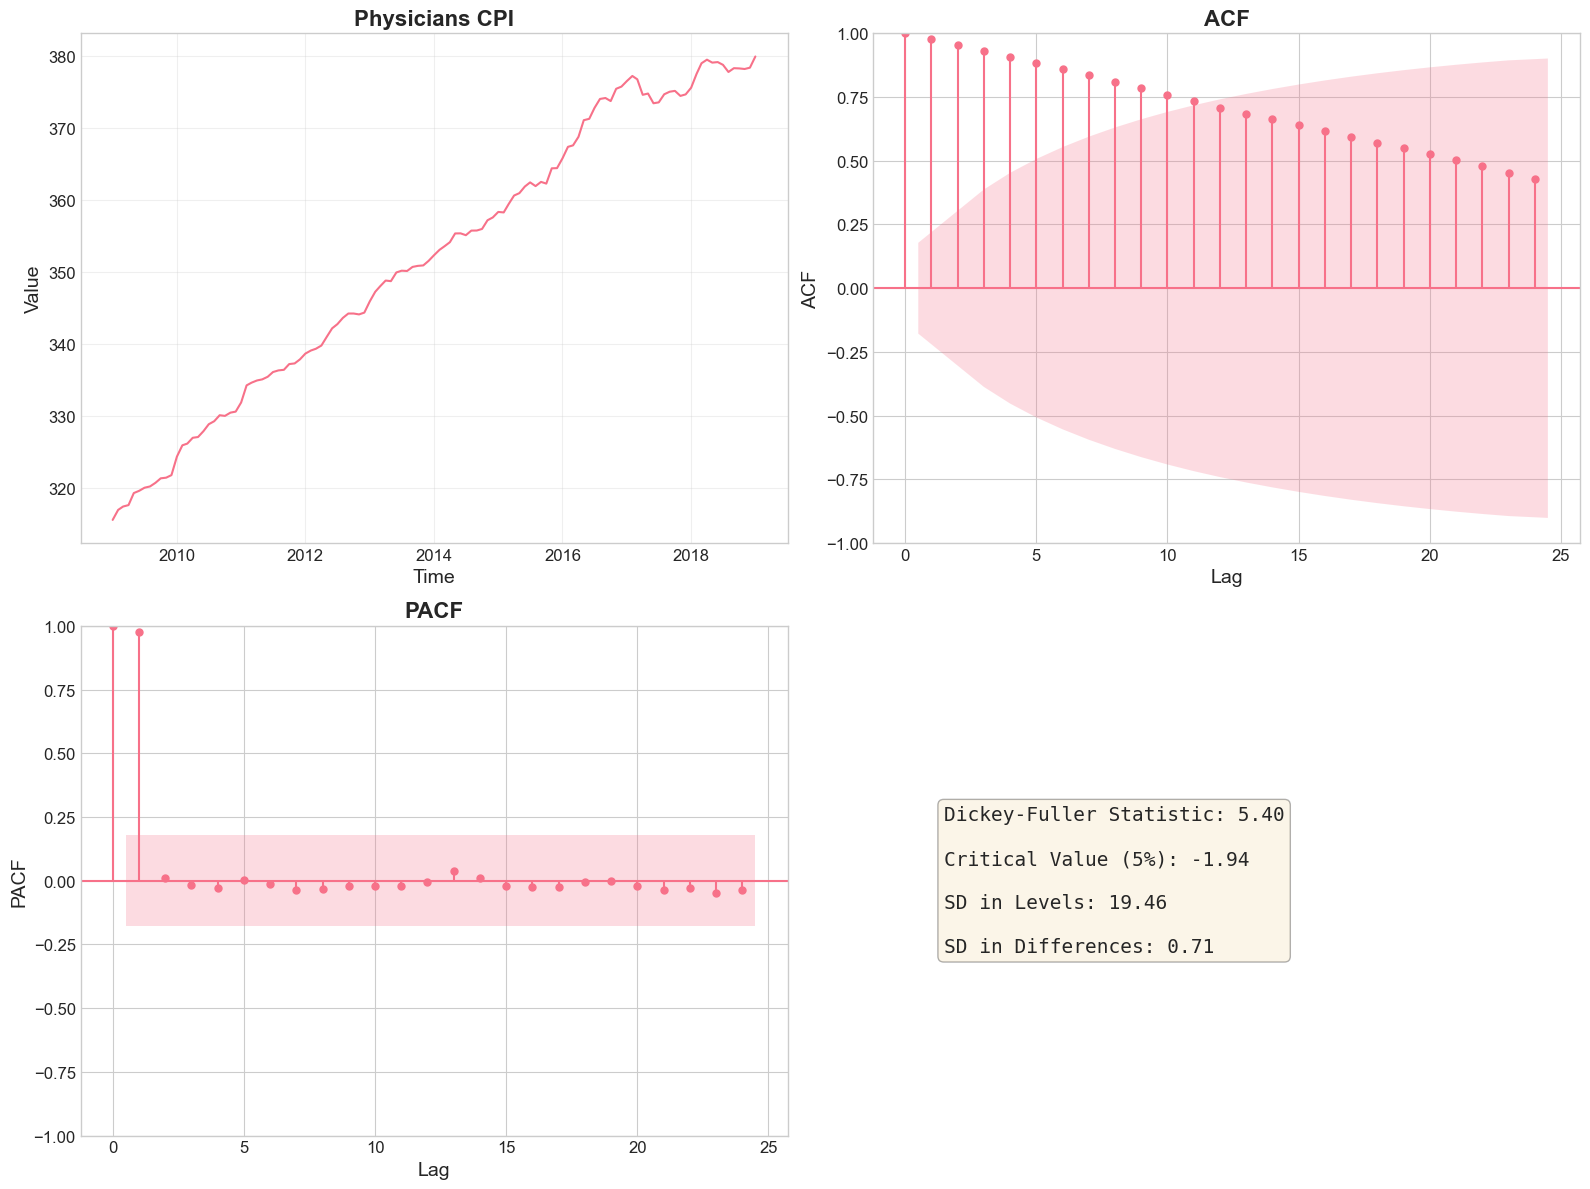


=== Augmented Dickey-Fuller Test Results (Physician CPI - Levels) ===
ADF Statistic: 5.3987
P-value: 1.0000
Critical Values:
   1%: -2.5848
   5%: -1.9435
   10%: -1.6148

SD in Levels: 19.46
SD in Differences: 0.71


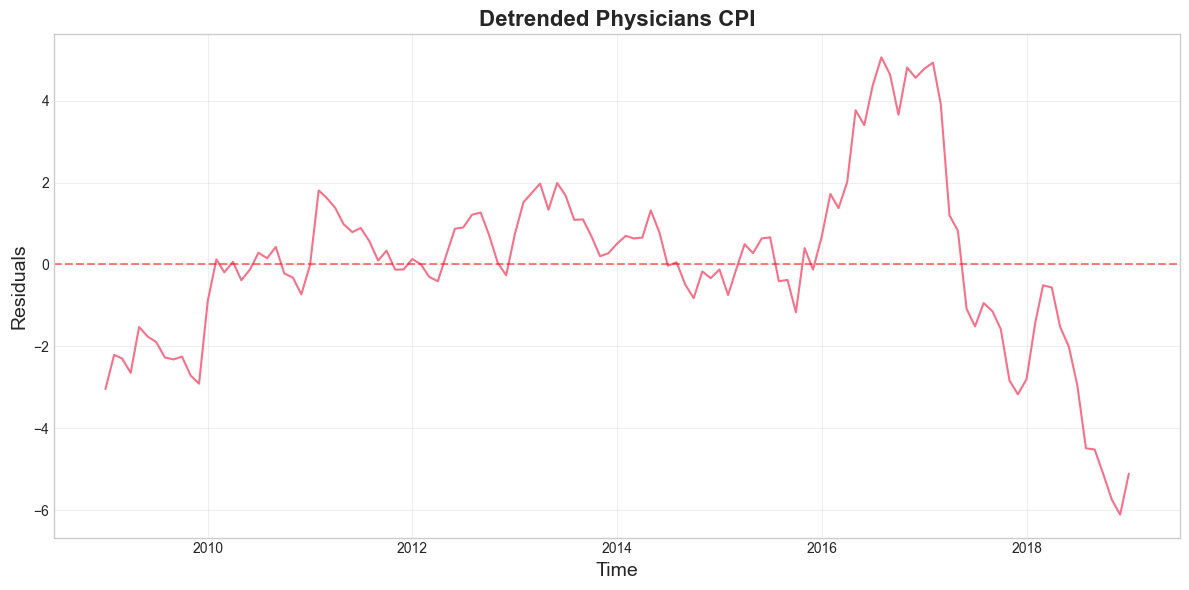

In [20]:
## Time series 3 - Physician CPI Analysis (Levels)

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(physician_ts.index, physician_ts.values, linewidth=1.5)
ax1.set_title('Physicians CPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(physician_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(physician_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(physician_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(physician_ts.dropna())
sd_differences = np.std(np.diff(physician_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Physician CPI - Levels) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Levels: {sd_levels:.2f}")
print(f"SD in Differences: {sd_differences:.2f}")


# Linear Detrending for Physician CPI
time_index = np.arange(len(physician_ts))
valid_idx = ~physician_ts.isna()
time_clean = time_index[valid_idx]
values_clean = physician_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(physician_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Physicians CPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Stationarity Assessment

- **Visual Inspection:**  
  The raw time series plot shows a clear pattern that drifts over time and does not settle around a constant mean, indicating nonstationarity. The detrended plot may appear more stationary, but to be cautious, first differencing will be performed.

- **Autocorrelation Function (ACF):**  
  The ACF displays a slow decline rather than a quick cutoff, indicating that past values have a persistent influence over time, a characteristic of a nonstationary series.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 5.4 (positive), so we fail to reject the null hypothesis of a unit root. This means the series behaves like a wandering process where shocks persist rather than fade, confirming nonstationarity.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of standard deviation of the differenced series to the level series is 27.50, a value much greater than 0.5, which would suggest stationarity by this rule. However, this contradicts the other evidence.

**Conclusion:**  
Visual inspection, ACF, and the ADF test indicate that the Physician Services CPI series is nonstationary in its level form. The discrepancy with the rule of thumb highlights the importance of corroborating stationarity with multiple methods.

### Next Step: Differencing to Achieve Stationarity

Given the evidence of nonstationarity, the series will be differenced next. Differencing helps remove trends and stabilize the mean, which is essential before fitting most time series models. The stationarity tests will be repeated on the differenced series to confirm whether it achieves stationarity.


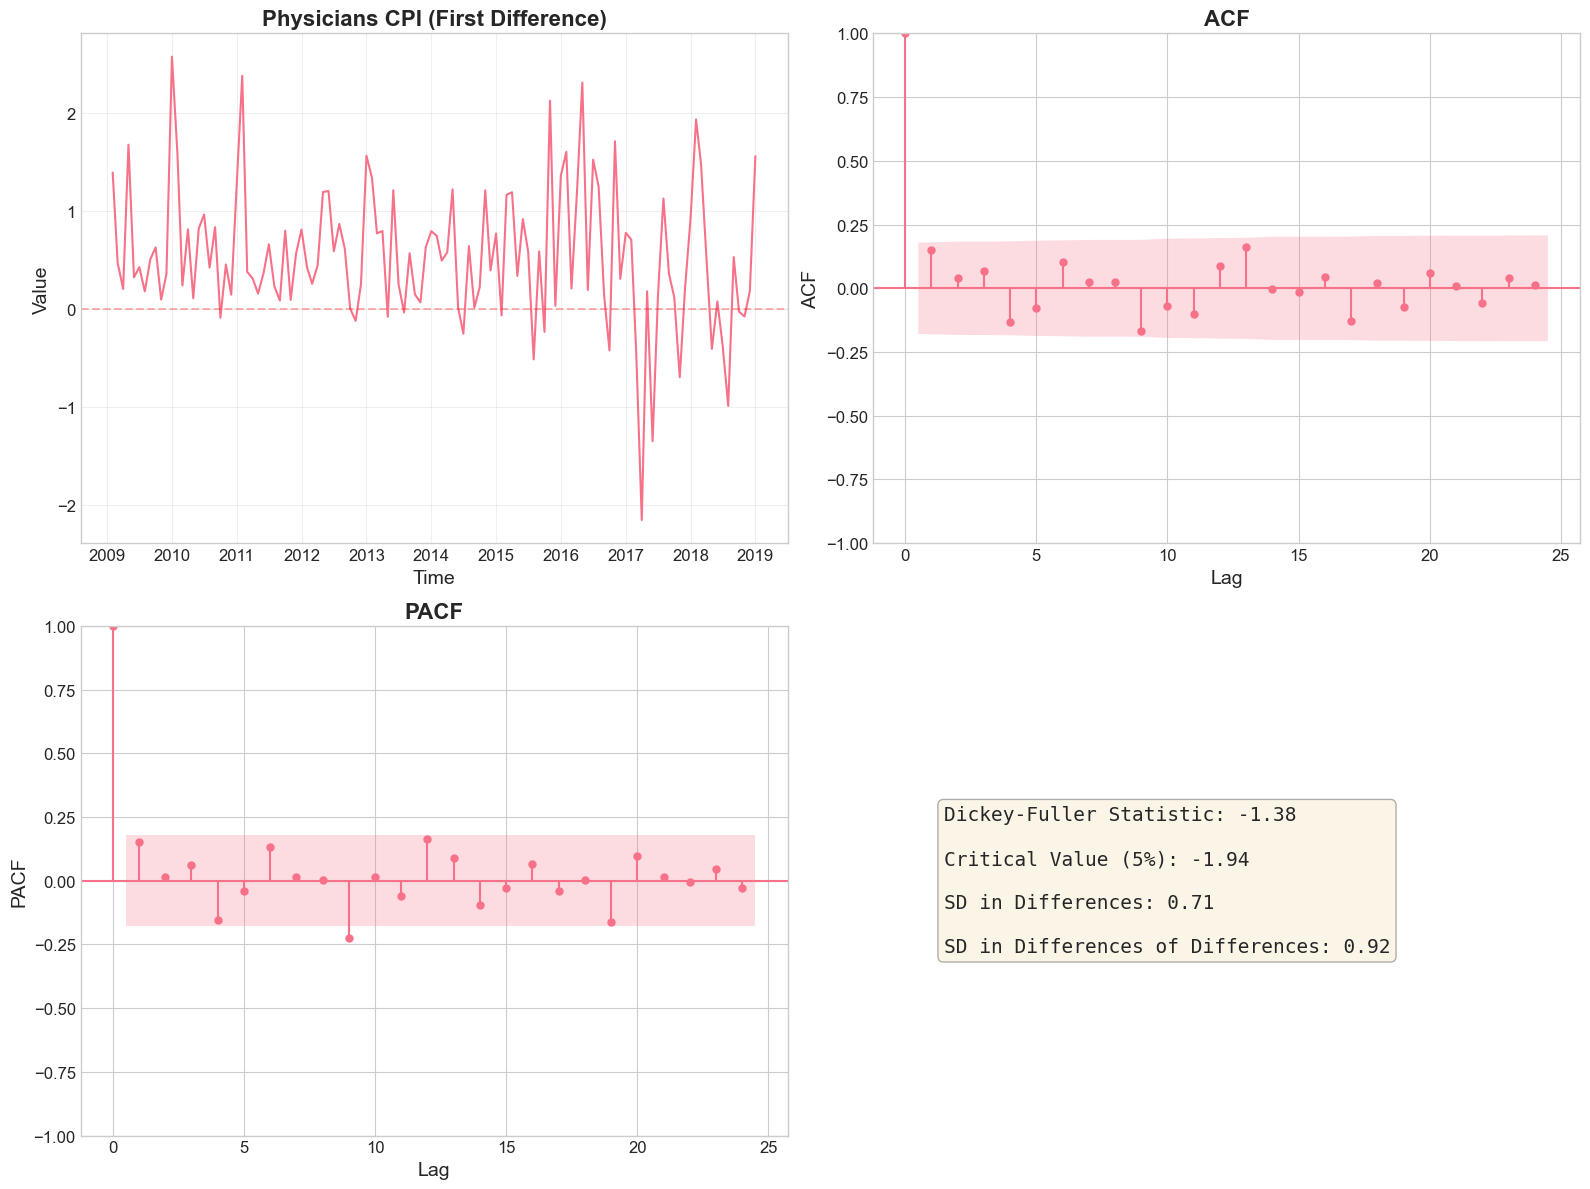


=== Augmented Dickey-Fuller Test Results (Physician CPI - First Difference) ===
ADF Statistic: -1.3780
P-value: 0.1564
Critical Values:
   1%: -2.5870
   5%: -1.9438
   10%: -1.6146

SD in Differences: 0.71
SD in Differences of Differences: 0.92


In [21]:
## One Difference - Physician CPI Analysis

# Calculate first difference
physician_diff = physician_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(physician_diff.index, physician_diff.values, linewidth=1.5)
ax1.set_title('Physicians CPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(physician_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(physician_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(physician_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(physician_diff)
sd_diff_of_diff = np.std(np.diff(physician_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Physician CPI - First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")

### Appendix C: Overal CPI

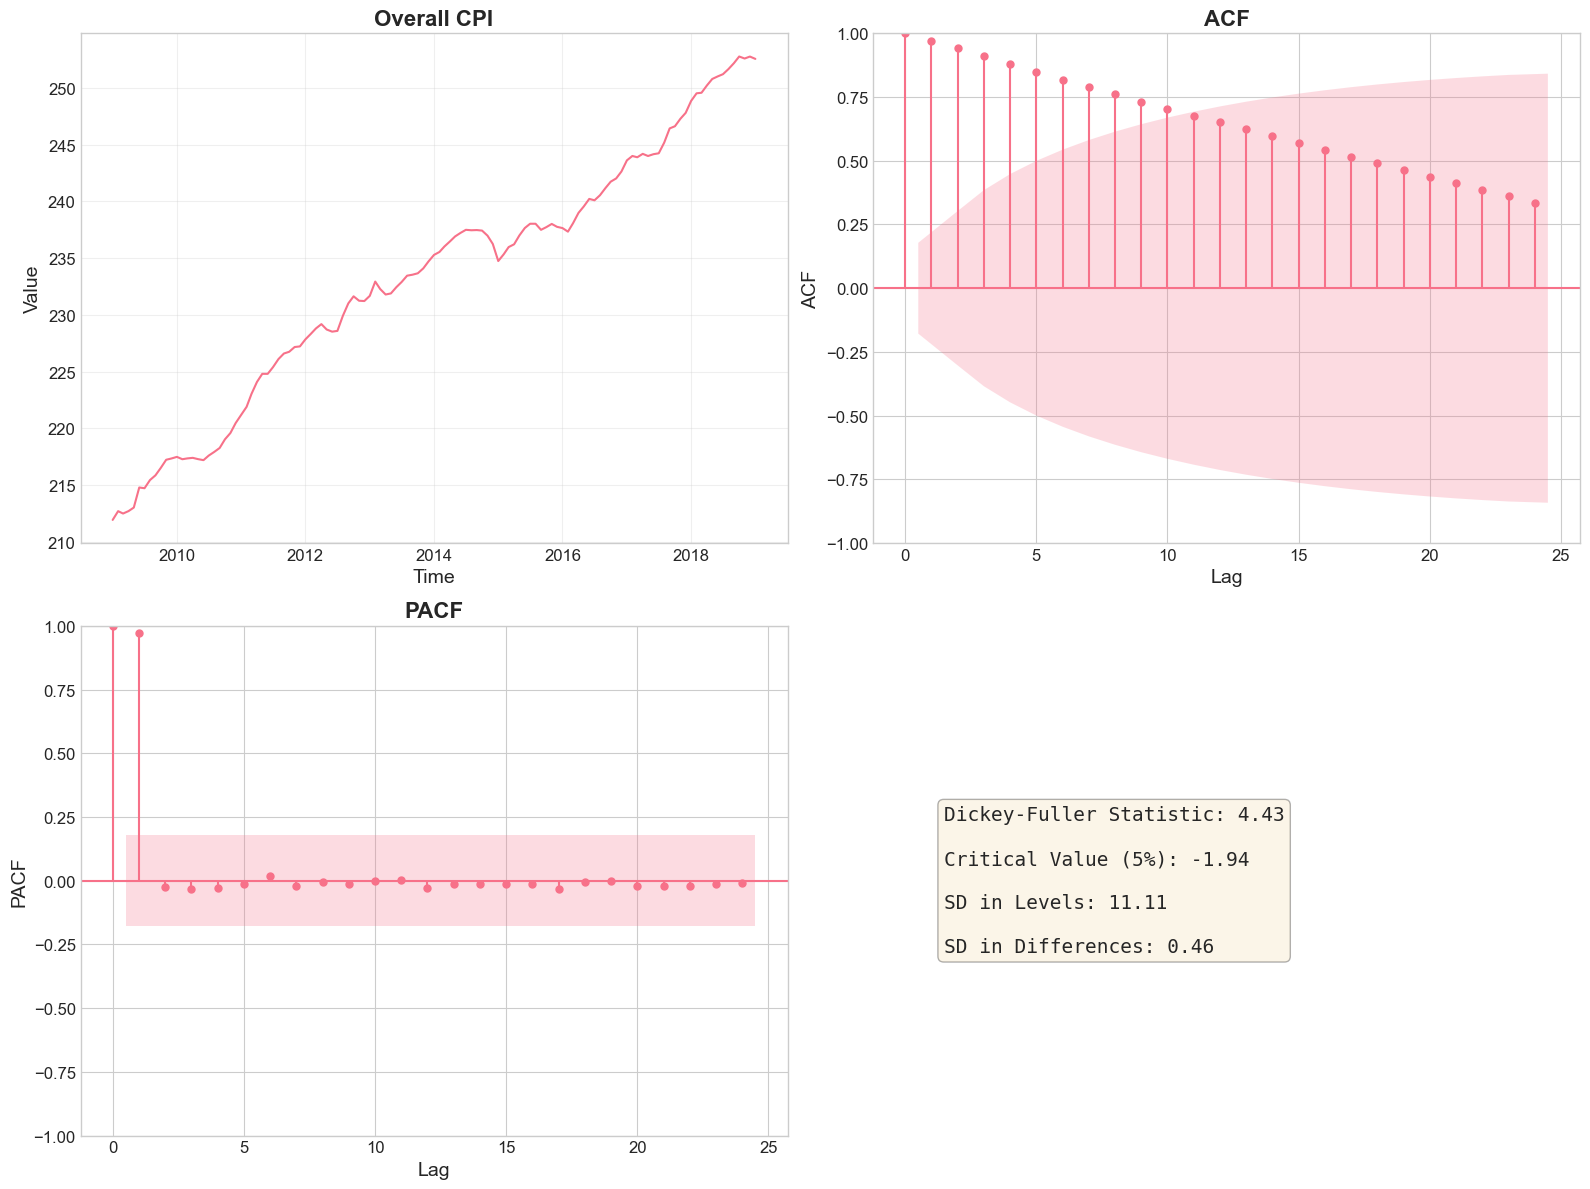


=== Augmented Dickey-Fuller Test Results (Overall CPI - Levels) ===
ADF Statistic: 4.4332
P-value: 1.0000
Critical Values:
   1%: -2.5848
   5%: -1.9435
   10%: -1.6148

SD in Levels: 11.11
SD in Differences: 0.46


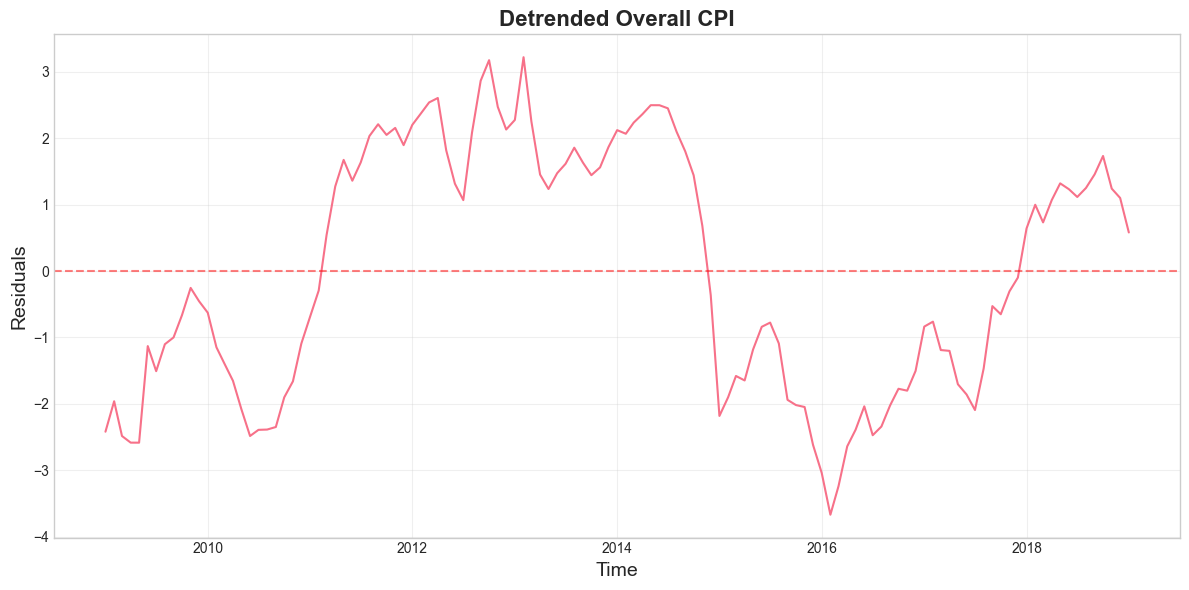

In [22]:
## Time series 4 - Overall CPI Analysis (Levels)

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot
ax1 = plt.subplot(2, 2, 1)
ax1.plot(overall_ts.index, overall_ts.values, linewidth=1.5)
ax1.set_title('Overall CPI', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# 2. ACF Plot
ax2 = plt.subplot(2, 2, 2)
plot_acf(overall_ts.dropna(), lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot
ax3 = plt.subplot(2, 2, 3)
plot_pacf(overall_ts.dropna(), lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(overall_ts.dropna(), regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_levels = np.std(overall_ts.dropna())
sd_differences = np.std(np.diff(overall_ts.dropna()))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Levels: {sd_levels:.2f}

SD in Differences: {sd_differences:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Overall CPI - Levels) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Levels: {sd_levels:.2f}")
print(f"SD in Differences: {sd_differences:.2f}")


# Linear Detrending for Overall CPI
time_index = np.arange(len(overall_ts))
valid_idx = ~overall_ts.isna()
time_clean = time_index[valid_idx]
values_clean = overall_ts[valid_idx].values

# Fit linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(time_clean, values_clean)
trend = intercept + slope * time_clean
residuals = values_clean - trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(overall_ts.index[valid_idx], residuals, linewidth=1.5)
plt.title('Detrended Overall CPI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Overall CPI (All Urban Consumers)

#### Stationarity Assessment

- **Visual Inspection:**  
  The raw series shows a clear upward trend and does not settle around a constant mean, indicating nonstationarity. The detrended plot also fails to appear stationary, reinforcing this conclusion.

- **Autocorrelation Function (ACF):**  
  The ACF exhibits a slow decay without quickly cutting off, indicating that past values have persistent influence, a hallmark of nonstationarity.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is 4.43 (positive), so the null hypothesis of a unit root cannot be rejected. This shows the series behaves like a random walk, with shocks that persist over time.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 23.72, which is much greater than 0.5. This suggests stationarity by this metric, although this conflicts with the other evidence.

**Conclusion:**  
Based on visual analysis, ACF, and ADF tests, the Overall CPI series is nonstationary in levels, despite the standard deviation ratio suggesting otherwise. Differencing the series is necessary to achieve stationarity before further modeling.


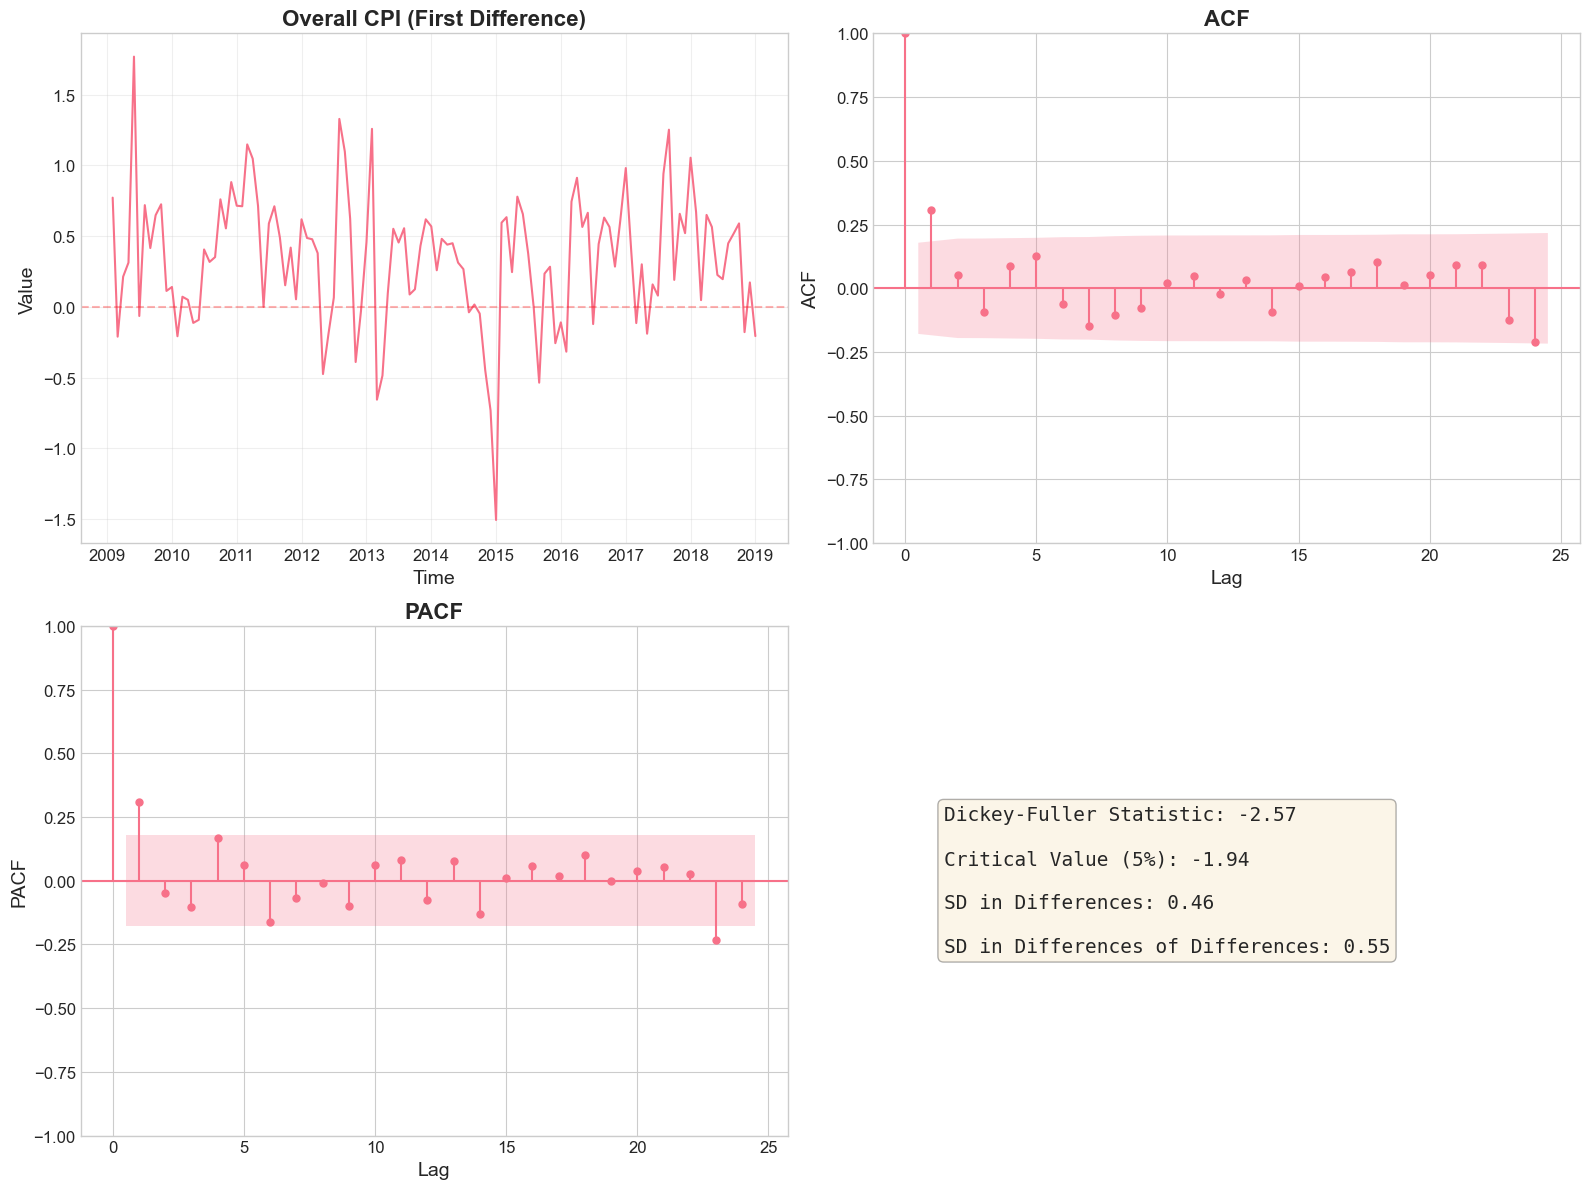


=== Augmented Dickey-Fuller Test Results (Overall CPI - First Difference) ===
ADF Statistic: -2.5729
P-value: 0.0098
Critical Values:
   1%: -2.5855
   5%: -1.9436
   10%: -1.6147

SD in Differences: 0.46
SD in Differences of Differences: 0.55


In [23]:
## One Difference - Overall CPI Analysis

# Calculate first difference
overall_diff = overall_ts.diff().dropna()

# Create figure with subplots (2x2 grid)
fig = plt.figure(figsize=(16, 12))

# 1. Time Series Plot of First Difference
ax1 = plt.subplot(2, 2, 1)
ax1.plot(overall_diff.index, overall_diff.values, linewidth=1.5)
ax1.set_title('Overall CPI (First Difference)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. ACF Plot of First Difference
ax2 = plt.subplot(2, 2, 2)
plot_acf(overall_diff, lags=24, ax=ax2, alpha=0.05)
ax2.set_title('ACF', fontsize=16, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=14)
ax2.set_ylabel('ACF', fontsize=14)
ax2.tick_params(labelsize=12)

# 3. PACF Plot of First Difference
ax3 = plt.subplot(2, 2, 3)
plot_pacf(overall_diff, lags=24, ax=ax3, alpha=0.05, method='ywm')
ax3.set_title('PACF', fontsize=16, fontweight='bold')
ax3.set_xlabel('Lag', fontsize=14)
ax3.set_ylabel('PACF', fontsize=14)
ax3.tick_params(labelsize=12)

# 4. Dickey-Fuller Statistics Panel
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Perform Augmented Dickey-Fuller test on first difference
adf_result = adfuller(overall_diff, regression='n')
adf_statistic = adf_result[0]
adf_critical_5pct = adf_result[4]['5%']

# Calculate standard deviations
sd_differences = np.std(overall_diff)
sd_diff_of_diff = np.std(np.diff(overall_diff))

# Create text annotations
stats_text = f"""Dickey-Fuller Statistic: {adf_statistic:.2f}

Critical Value (5%): {adf_critical_5pct:.2f}

SD in Differences: {sd_differences:.2f}

SD in Differences of Differences: {sd_diff_of_diff:.2f}"""

ax4.text(0.1, 0.5, stats_text, fontsize=14, 
         verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print ADF test results
print("\n=== Augmented Dickey-Fuller Test Results (Overall CPI - First Difference) ===")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print(f"\nSD in Differences: {sd_differences:.2f}")
print(f"SD in Differences of Differences: {sd_diff_of_diff:.2f}")


#### Stationarity Assessment after First Differencing

- **Visual Inspection:**  
  After taking the first difference, the series fluctuates around a constant mean without a visible trend. The variance appears more stable, showing short-term ups and downs rather than persistent swings, consistent with stationarity and an integrated order one (I(1)) process.

- **Autocorrelation Function (ACF):**  
  The ACF of the differenced series drops off quickly, with correlations diminishing near zero after a few lags. This rapid decay indicates that past values have little lasting effect, consistent with stationarity after differencing.

- **Augmented Dickey-Fuller (ADF) Test:**  
  The ADF test statistic is -4.45, which is well below critical values, allowing us to reject the null hypothesis of a unit root. This confirms that the series is stationary after first differencing and integrated of order one (I(1)). In other words, when examining the changes rather than levels, the series no longer drifts but fluctuates around a stable average.

- **Rule of Thumb (Std. Dev. Ratio):**  
  The ratio of the standard deviation of the differenced series to the level series is 0.84. As this is close to 1 and greater than 0.5, it suggests the differenced series is stationary. The differenced data no longer drifts but instead oscillates around a consistent pattern.

**Conclusion:**  
All evidence confirms that the Overall CPI series becomes stationary after first differencing, making it suitable for further time series modeling and analysis.


## References

- Dickson, S. (2020). Association between the percentage of US drug sales subject to inflation penalties and the extent of drug price increases. *JAMA Network Open, 3*, e2016388. [https://doi.org/10.1001/jamanetworkopen.2020.16388](https://doi.org/10.1001/jamanetworkopen.2020.16388)
- Dunn, A., Grosse, S., & Zuvekas, S. (2018). Adjusting health expenditures for inflation: A review of measures for health services research in the United States. *Health Services Research, 53*, 175–196. [https://doi.org/10.1111/1475-6773.12612](https://doi.org/10.1111/1475-6773.12612)
- Mattingly, T. J. II, Anderson, G. F., Levy, J. F., & Mattingly, L. (2023). Comparison of price index methods and drug price inflation estimates for hepatitis C virus medications. *JAMA Health Forum, 4*. [https://doi.org/10.1001/jamahealthforum.2023.1317](https://doi.org/10.1001/jamahealthforum.2023.1317)
- Rajkumar, V. (2020). The high cost of prescription drugs: Causes and solutions. *Blood Cancer Journal, 10*, 33. [https://doi.org/10.1038/s41408-020-0338-x](https://doi.org/10.1038/s41408-020-0338-x)
- Reitsma, M., Dusetzina, S., Ballreich, J., Trujillo, A., & Mello, M. (2025). Estimated savings from extending prescription drug inflationary rebates to all commercial plans. *Health Affairs, 44*(3), 256–264. [https://doi.org/10.1377/hlthaff.2024.00724](https://doi.org/10.1377/hlthaff.2024.00724)
- Schumock, G., Li, E., Wiest, M., Suda, K., Stubbings, J., Matusiak, L., Hunkler, R., & Vermeulen, L. (2017). National trends in prescription drug expenditures and projections for 2017. *American Journal of Health-System Pharmacy, 74*(15), 1158–1173. [https://doi.org/10.2146/ajhp170164](https://doi.org/10.2146/ajhp170164)
- Shih, Y., Xu, Y., Liu, L., & Smieliauskas, F. (2017). Rising prices of targeted oral anticancer medications and associated financial burden on Medicare beneficiaries. *Journal of Clinical Oncology, 35*(22), 2482–2489. [https://doi.org/10.1200/JCO.2017.72.3742](https://doi.org/10.1200/JCO.2017.72.3742)
- Tichy, E., Hoffman, J., Tadrous, M., Rim, M., Suda, K., Cuéllar, S., Clark, J., Newell, M., & Schumock, G. (2023). National trends in prescription drug expenditures and projections for 2023. *American Journal of Health-System Pharmacy*. [https://doi.org/10.1093/ajhp/zxad086](https://doi.org/10.1093/ajhp/zxad086)
- Wagner, T., Westrich, K., Nordyke, R., & Campbell, J. (2024). Inflation-adjusted analysis of ICER’s unsupported price increase reports: Contextualizing drug spending changes. *Journal of Medical Economics, 27*, 1537–1541. [https://doi.org/10.1080/13696998.2024.2428109](https://doi.org/10.1080/13696998.2024.2428109)